# Setup and Imports

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Part 1: Exploratory Data Analysis (EDA)**


### Set Style and Print Step Header

In [ ]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. LOAD AND INSPECT DATA
print("=" * 60)
print("STEP 1: LOADING AND INITIAL INSPECTION")
print("=" * 60)

STEP 1: LOADING AND INITIAL INSPECTION


In [ ]:
# Load the dataset
df = pd.read_csv('/content/IMDB-Dataset.csv', engine='python', on_bad_lines='skip')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (50000, 2)
Columns: ['review', 'sentiment']

First 5 rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
print("\n" + "=" * 60)
print("BASIC INFO:")
print("=" * 60)
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())


BASIC INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

Missing values:
review       0
sentiment    0
dtype: int64


In [ ]:
# 2. SENTIMENT DISTRIBUTION ANALYSIS
print("\n" + "=" * 60)
print("STEP 2: SENTIMENT DISTRIBUTION ANALYSIS")
print("=" * 60)

# Count sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment distribution:")
print(sentiment_counts)
print(f"\nPositive percentage: {sentiment_counts['positive']/len(df)*100:.2f}%")
print(f"Negative percentage: {sentiment_counts['negative']/len(df)*100:.2f}%")


STEP 2: SENTIMENT DISTRIBUTION ANALYSIS
Sentiment distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Positive percentage: 50.00%
Negative percentage: 50.00%


####Visualize Sentiment Distribution

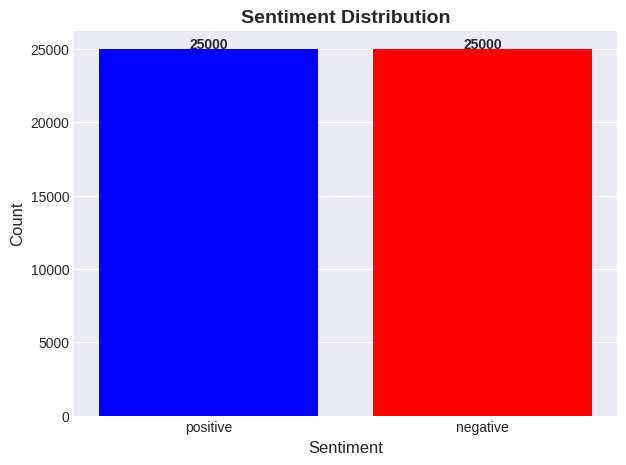

In [ ]:
# Visualization
plt.figure(figsize=(7, 5))

# Bar plot
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['blue', 'red'])
plt.title('Sentiment Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)

# Value labels on bars
for i, v in enumerate(sentiment_counts.values):
    plt.text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.show()



This cell generates a bar chart to visually represent the class balance. The plot shows two bars of equal height (labeled "positive" in blue and "negative" in red), each with a count of 25,000 displayed on top, reinforcing the finding from the previous cell.

In [ ]:
# 3. TEXT LENGTH ANALYSIS
print("\n" + "=" * 60)
print("STEP 3: TEXT LENGTH ANALYSIS")
print("=" * 60)

# Calculate review lengths
df['review_length'] = df['review'].apply(len)
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['review'].apply(lambda x: len(str(x).replace(" ", "")))

print("Text length statistics:")
print(df[['review_length', 'word_count', 'char_count']].describe())


STEP 3: TEXT LENGTH ANALYSIS
Text length statistics:
       review_length    word_count    char_count
count   50000.000000  50000.000000  50000.000000
mean     1309.431020    231.156940   1079.285080
std       989.728014    171.343997    819.058664
min        32.000000      4.000000     27.000000
25%       699.000000    126.000000    573.000000
50%       970.000000    173.000000    799.000000
75%      1590.250000    280.000000   1311.000000
max     13704.000000   2470.000000  11235.000000


##### Visualize Review Lengths

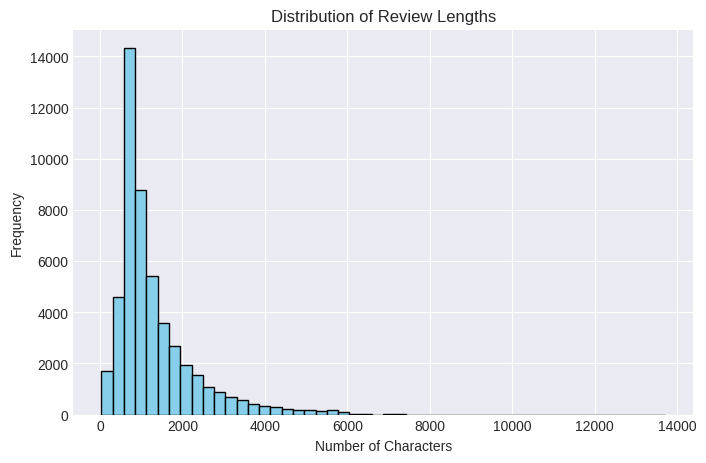

In [ ]:
# Visualization
plt.figure(figsize=(8, 5))

# Histogram of review lengths
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths', fontsize=12)
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.show()


This cell generates a histogram to show the distribution of review lengths (in characters). The plot is right-skewed, indicating that while most reviews are relatively short, there is a long tail of much longer reviews.

#####Box Plot of Length by Sentiment

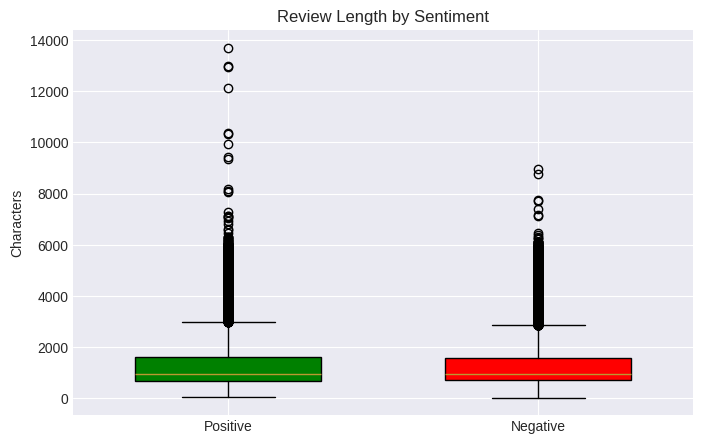

In [ ]:
# Box plot by sentiment
plt.figure(figsize=(8, 5))

sentiment_groups = df.groupby('sentiment')
colors = {'positive': 'green', 'negative': 'red'}

for sentiment, group in sentiment_groups:
    plt.boxplot(
        group['review_length'],
        positions=[list(colors.keys()).index(sentiment)],
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor=colors[sentiment])
    )

plt.title('Review Length by Sentiment', fontsize=12)
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.ylabel('Characters')

plt.show()


This cell creates box plots to compare the distribution of review lengths for positive and negative reviews. The plots show that the median, quartiles, and overall distribution are very similar for both sentiments, suggesting that review length alone is not a strong indicator of sentiment.

#####Visualize Word Count Distribution

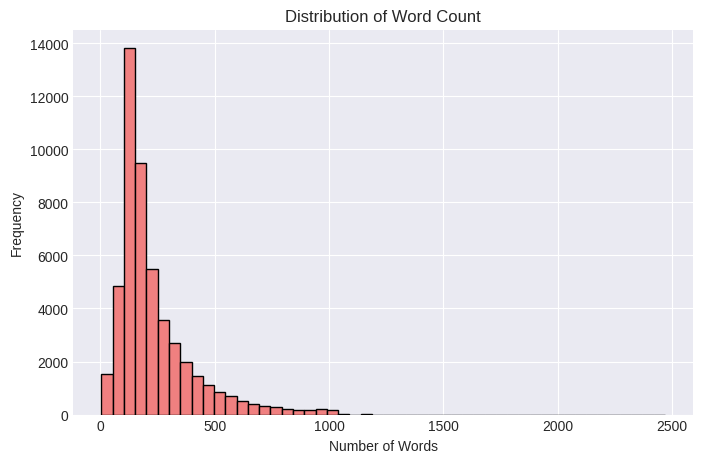

In [ ]:
# Word count distribution
plt.figure(figsize=(8, 5))

plt.hist(df['word_count'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Word Count', fontsize=12)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.show()


#####Bar Plot of Average Review Length by Sentiment

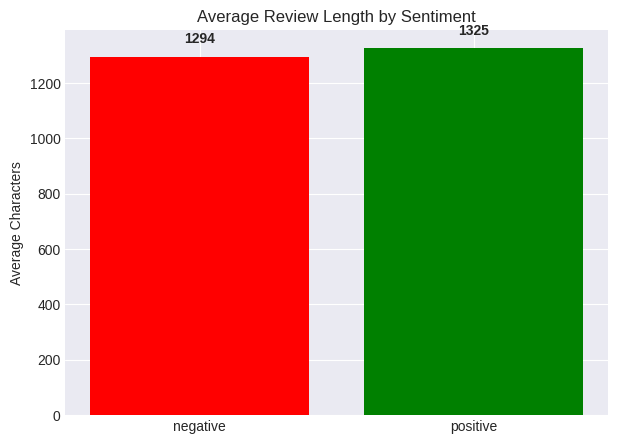

In [ ]:
# Average length by sentiment
avg_lengths = df.groupby('sentiment')['review_length'].mean()

plt.figure(figsize=(7, 5))

plt.bar(
    avg_lengths.index,
    avg_lengths.values,
    color=[colors[s] for s in avg_lengths.index]
)

plt.title('Average Review Length by Sentiment', fontsize=12)
plt.ylabel('Average Characters')

# Value labels on bars
for i, v in enumerate(avg_lengths.values):
    plt.text(i, v + 50, f'{v:.0f}', ha='center', fontweight='bold')

plt.show()


In [ ]:
#####Scatter Plot of Word Count vs. Character Count

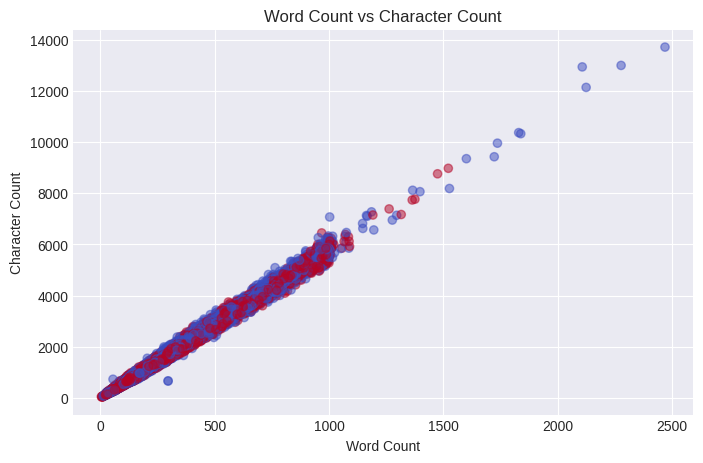

In [ ]:
# Scatter plot: length vs word count
plt.figure(figsize=(8, 5))

plt.scatter(
    df['word_count'],
    df['review_length'],
    c=df['sentiment'].map({'positive': 0, 'negative': 1}),
    alpha=0.5,
    cmap='coolwarm'
)

plt.title('Word Count vs Character Count', fontsize=12)
plt.xlabel('Word Count')
plt.ylabel('Character Count')

plt.show()


This scatter plot visualizes the strong positive linear relationship between the number of words in a review and its total character count. The points form a tight, diagonal line, with the color mapping showing the distribution of positive and negative reviews across this trend.

#####KDE Plot of Word Count by Sentiment

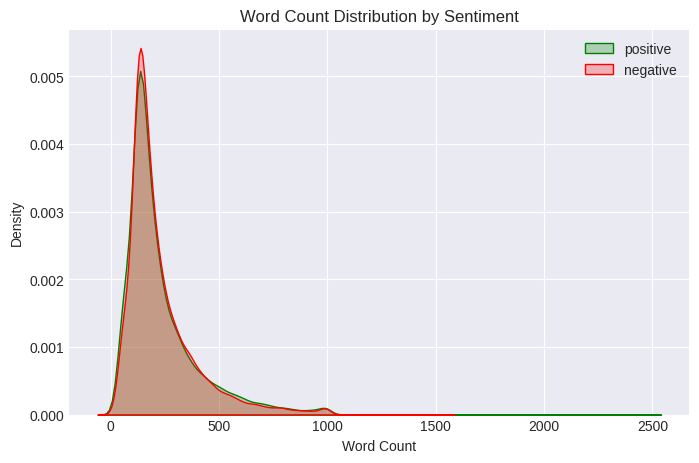

In [ ]:
# KDE plot for both sentiments
plt.figure(figsize=(8, 5))

for sentiment, color in colors.items():
    subset = df[df['sentiment'] == sentiment]
    sns.kdeplot(
        data=subset['word_count'],
        label=sentiment,
        color=color,
        fill=True
    )

plt.title('Word Count Distribution by Sentiment', fontsize=12)
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()

plt.show()


This cell creates a Kernel Density Estimate (KDE) plot, which is a smoothed version of a histogram, for the word count of each sentiment. The two distributions overlap almost perfectly, providing a clear visual confirmation that the distribution of review lengths is nearly identical for positive and negative reviews.

In [ ]:
# 4. TEXT PREVIEW AND PATTERNS
print("\n" + "=" * 60)
print("STEP 4: TEXT CONTENT ANALYSIS")
print("=" * 60)


STEP 4: TEXT CONTENT ANALYSIS


In [ ]:
# Show sample reviews in clean format

def show_sample_reviews(df, sentiment, n=3, preview_len=200):
    print(f"\n{'='*50}")
    print(f"Sample {sentiment.capitalize()} Reviews")
    print(f"{'='*50}")

    reviews = df[df['sentiment'] == sentiment]['review'].head(n).tolist()

    for i, review in enumerate(reviews, start=1):
        print(f"\n🔹 Review {i}:")
        print(review[:preview_len] + "...")
        print("-" * 50)

# Display samples
show_sample_reviews(df, 'positive', n=3)
show_sample_reviews(df, 'negative', n=3)



Sample Positive Reviews

🔹 Review 1:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo...
--------------------------------------------------

🔹 Review 2:
A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece...
--------------------------------------------------

🔹 Review 3:
I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is wi...
--------------------------------------------------

Sample Negative Reviews

🔹 Review 1:
Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<b

####HTML Tags Analysis

In [ ]:
# 5. HTML TAGS ANALYSIS
print("\n" + "=" * 60)
print("STEP 5: HTML TAGS ANALYSIS")
print("=" * 60)

# Check for HTML tags
df['has_html'] = df['review'].str.contains('<.*?>')
html_stats = df['has_html'].value_counts()
print(f"Reviews containing HTML tags: {html_stats.get(True, 0)} ({html_stats.get(True, 0)/len(df)*100:.2f}%)")
print(f"Reviews without HTML tags: {html_stats.get(False, 0)} ({html_stats.get(False, 0)/len(df)*100:.2f}%)")


STEP 5: HTML TAGS ANALYSIS
Reviews containing HTML tags: 29202 (58.40%)
Reviews without HTML tags: 20798 (41.60%)


####Count Specific HTML Tags

In [ ]:
# Count specific HTML tags
tags_to_check = ['<br />', '<br>', '<p>', '</p>', '<div>']
print("\nSpecific HTML tag counts:")
for tag in tags_to_check:
    count = df['review'].str.contains(tag, regex=False).sum()
    print(f"{tag}: {count} occurrences")


Specific HTML tag counts:
<br />: 29200 occurrences
<br>: 0 occurrences
<p>: 1 occurrences
</p>: 0 occurrences
<div>: 0 occurrences


####Word Frequency Analysis

In [ ]:
# 6. WORD FREQUENCY ANALYSIS
print("\n" + "=" * 60)
print("STEP 6: WORD FREQUENCY ANALYSIS")
print("=" * 60)

from collections import Counter
import re

def clean_text_for_freq(text):
    """Basic cleaning for frequency analysis"""
    text = text.lower()
    text = re.sub(r'<.*?>', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    words = text.split()
    return words

# Get most common words for each sentiment
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'].tolist())
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'].tolist())

positive_words = clean_text_for_freq(positive_reviews)
negative_words = clean_text_for_freq(negative_reviews)

positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

print("\nTop 10 words in POSITIVE reviews:")
for word, count in positive_word_freq.most_common(10):
    print(f"  {word}: {count}")

print("\nTop 10 words in NEGATIVE reviews:")
for word, count in negative_word_freq.most_common(10):
    print(f"  {word}: {count}")



STEP 6: WORD FREQUENCY ANALYSIS

Top 10 words in POSITIVE reviews:
  the: 341219
  and: 176605
  a: 164304
  of: 152083
  to: 131305
  is: 111810
  in: 99235
  it: 95122
  i: 81987
  this: 69642

Top 10 words in NEGATIVE reviews:
  the: 326571
  a: 158592
  and: 147750
  of: 137251
  to: 136746
  is: 99197
  it: 95689
  i: 93574
  in: 87486
  this: 81311


This cell performs a basic word frequency analysis. It prints the top 10 most common words for positive and negative reviews. The results for both sentiments are nearly identical and consist mostly of stopwords (e.g., 'the', 'and', 'a', 'of'), which are not informative for sentiment analysis.

####Word Frequency Excluding Stopwords

In [ ]:
# Remove common stopwords for better insight
common_stopwords = set(['the', 'and', 'to', 'of', 'a', 'in', 'is', 'it', 'that', 'this', 'has', 'have', 'as','just','if','can','an','her','about','very',
                       'was', 'as', 'for', 'with', 'but', 'on', 'are', 'be', 'at', 'or','i','s','his','he','you','t','so','have','by','an','from','there','they'])

positive_word_freq_filtered = {k: v for k, v in positive_word_freq.items() if k not in common_stopwords}
negative_word_freq_filtered = {k: v for k, v in negative_word_freq.items() if k not in common_stopwords}

print("\nTop 10 words in POSITIVE reviews (excluding common stopwords):")
for word, count in sorted(positive_word_freq_filtered.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"  {word}: {count}")

print("\nTop 10 words in NEGATIVE reviews (excluding common stopwords):")
for word, count in sorted(negative_word_freq_filtered.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"  {word}: {count}")


Top 10 words in POSITIVE reviews (excluding common stopwords):
  film: 42095
  movie: 37848
  not: 28302
  one: 27316
  all: 23129
  who: 22599
  like: 17714
  out: 16211
  what: 15270
  good: 15025

Top 10 words in NEGATIVE reviews (excluding common stopwords):
  movie: 50094
  film: 37582
  not: 32432
  one: 26272
  all: 23799
  like: 22449
  who: 19624
  out: 17980
  what: 16961
  some: 16656


After removing common stopwords, the top word lists become more insightful. For positive reviews, words like "film", "movie", and "good" are prominent. For negative reviews, "movie" is also top, but we start to see potentially negative-leaning words later in the list. This highlights the need for more sophisticated analysis.

####Unique Words Analysis

In [ ]:
# 7. UNIQUE WORDS ANALYSIS
print("\n" + "=" * 60)
print("STEP 7: UNIQUE WORDS ANALYSIS")
print("=" * 60)

positive_unique = set(positive_word_freq.keys())
negative_unique = set(negative_word_freq.keys())

print(f"Total unique words in positive reviews: {len(positive_unique)}")
print(f"Total unique words in negative reviews: {len(negative_unique)}")
print(f"Words only in positive reviews: {len(positive_unique - negative_unique)}")
print(f"Words only in negative reviews: {len(negative_unique - positive_unique)}")
print(f"Common words in both: {len(positive_unique & negative_unique)}")


STEP 7: UNIQUE WORDS ANALYSIS
Total unique words in positive reviews: 75766
Total unique words in negative reviews: 72867
Words only in positive reviews: 29060
Words only in negative reviews: 26161
Common words in both: 46706


####Sentiment-Specific Metrics

In [ ]:
# 8. SENTIMENT SPECIFIC METRICS
print("\n" + "=" * 60)
print("STEP 8: SENTIMENT-SPECIFIC METRICS")
print("=" * 60)

# Calculate statistics by sentiment
sentiment_stats = df.groupby('sentiment').agg({
    'review_length': ['mean', 'median', 'std', 'min', 'max'],
    'word_count': ['mean', 'median', 'std', 'min', 'max'],
    'char_count': ['mean', 'median', 'std', 'min', 'max']
}).round(2)

print("Statistics by sentiment:")
print(sentiment_stats)


STEP 8: SENTIMENT-SPECIFIC METRICS
Statistics by sentiment:
          review_length                            word_count                 \
                   mean median      std min    max       mean median     std   
sentiment                                                                      
negative        1294.06  973.0   945.89  32   8969     229.46  174.0  164.95   
positive        1324.80  968.0  1031.49  65  13704     232.85  172.0  177.50   

                    char_count                            
          min   max       mean median     std min    max  
sentiment                                                 
negative    4  1522    1065.61  800.0  781.56  27   7448  
positive   10  2470    1092.96  797.0  854.71  52  11235  


####REVIEW LENGTH CATEGORIES

In [ ]:
# 9. REVIEW LENGTH CATEGORIES
print("\n" + "=" * 60)
print("STEP 9: REVIEW LENGTH CATEGORIES")
print("=" * 60)

# Categorize reviews by length
df['length_category'] = pd.cut(df['word_count'],
                               bins=[0, 50, 100, 200, 500, 1000, 5000],
                               labels=['Very Short (0-50)', 'Short (51-100)',
                                      'Medium (101-200)', 'Long (201-500)',
                                      'Very Long (501-1000)', 'Extremely Long (1000+)'])

length_dist = df['length_category'].value_counts().sort_index()
print("Review length categories:")
for category, count in length_dist.items():
    percentage = (count / len(df)) * 100
    print(f"  {category}: {count} reviews ({percentage:.1f}%)")



STEP 9: REVIEW LENGTH CATEGORIES
Review length categories:
  Very Short (0-50): 1261 reviews (2.5%)
  Short (51-100): 4860 reviews (9.7%)
  Medium (101-200): 23449 reviews (46.9%)
  Long (201-500): 16527 reviews (33.1%)
  Very Long (501-1000): 3821 reviews (7.6%)
  Extremely Long (1000+): 82 reviews (0.2%)


####Visualize Length Categories

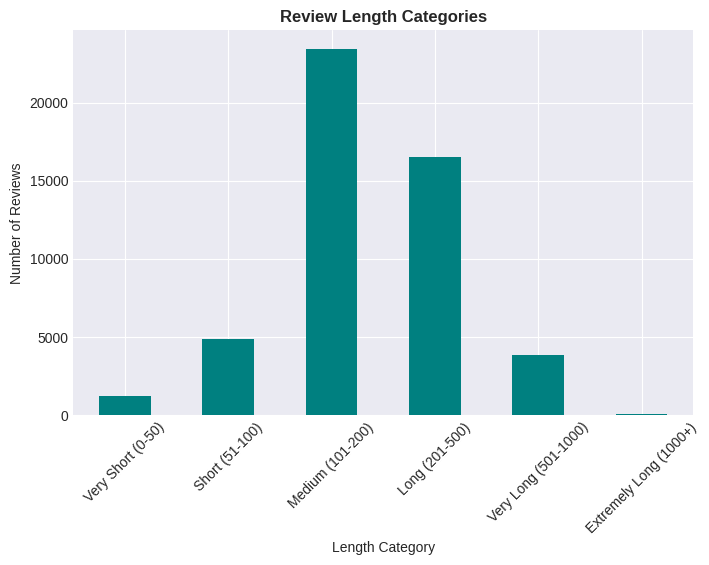

In [ ]:
# Visualization
plt.figure(figsize=(8, 5))

# Length category distribution
length_dist.plot(kind='bar', color='teal')
plt.title('Review Length Categories', fontsize=12, fontweight='bold')
plt.xlabel('Length Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

plt.show()


This cell creates a bar chart to visualize the distribution of reviews across the newly created length categories, providing a clear picture of which review lengths are most common.

####Sentiment Proportion in Each Category

<Figure size 900x500 with 0 Axes>

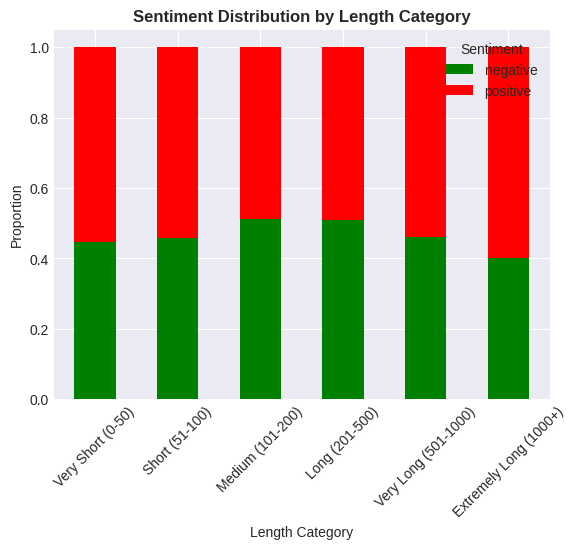

In [ ]:
# Sentiment proportion in each category
category_sentiment = pd.crosstab(
    df['length_category'],
    df['sentiment'],
    normalize='index'
)

plt.figure(figsize=(9, 5))

category_sentiment.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red']
)

plt.title('Sentiment Distribution by Length Category', fontsize=12, fontweight='bold')
plt.xlabel('Length Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

plt.show()


This cell creates a stacked bar chart showing the proportion of positive and negative reviews within each length category. All categories show a roughly 50/50 split, further proving that review length has no bearing on sentiment.

####CORRELATION ANALYSIS

In [ ]:
# 10. CORRELATION ANALYSIS
print("\n" + "=" * 60)
print("STEP 10: CORRELATION ANALYSIS")
print("=" * 60)

# Calculate correlations between numerical features
correlation_matrix = df[['review_length', 'word_count', 'char_count']].corr()
print("Correlation matrix:")
print(correlation_matrix)


STEP 10: CORRELATION ANALYSIS
Correlation matrix:
               review_length  word_count  char_count
review_length       1.000000    0.996830    0.999861
word_count          0.996830    1.000000    0.995368
char_count          0.999861    0.995368    1.000000


This cell calculates and prints the Pearson correlation coefficient between the three numerical features. The values are all extremely close to 1.0, confirming the perfect positive linear relationship observed in the earlier scatter plot.


In [ ]:
# 11. SUMMARY STATISTICS
print("\n" + "=" * 60)
print("STEP 11: FINAL SUMMARY")
print("=" * 60)

print(f"\nDATASET SUMMARY:")
print(f"Total reviews: {len(df)}")
print(f"Positive reviews: {sentiment_counts['positive']} ({sentiment_counts['positive']/len(df)*100:.1f}%)")
print(f"Negative reviews: {sentiment_counts['negative']} ({sentiment_counts['negative']/len(df)*100:.1f}%)")
print(f"Average review length: {df['review_length'].mean():.0f} characters")
print(f"Average word count: {df['word_count'].mean():.0f} words")
print(f"Shortest review: {df['review_length'].min()} characters")
print(f"Longest review: {df['review_length'].max()} characters")
print(f"Reviews with HTML tags: {html_stats.get(True, 0)} ({html_stats.get(True, 0)/len(df)*100:.1f}%)")

print("\nKEY INSIGHTS:")
print("1. Check if dataset is balanced or imbalanced")
print("2. Note the average and distribution of review lengths")
print("3. Identify common words/phrases for each sentiment")
print("4. Check for data quality issues (HTML tags, etc.)")
print("5. Understand text characteristics for preprocessing decisions")

# Save cleaned data for further analysis
df.to_csv('IMDB-Dataset-EDA-Processed.csv', index=False)
print("\nProcessed data saved to: IMDB-Dataset-EDA-Processed.csv")


STEP 11: FINAL SUMMARY

DATASET SUMMARY:
Total reviews: 50000
Positive reviews: 25000 (50.0%)
Negative reviews: 25000 (50.0%)
Average review length: 1309 characters
Average word count: 231 words
Shortest review: 32 characters
Longest review: 13704 characters
Reviews with HTML tags: 29202 (58.4%)

KEY INSIGHTS:
1. Check if dataset is balanced or imbalanced
2. Note the average and distribution of review lengths
3. Identify common words/phrases for each sentiment
4. Check for data quality issues (HTML tags, etc.)
5. Understand text characteristics for preprocessing decisions

Processed data saved to: IMDB-Dataset-EDA-Processed.csv


## **Part 2: Text Preprocessing**

###NLTK Setup

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
print("Downloading NLTK resources...")
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet')
except:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-eng')  # Open Multilingual WordNet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Error loading omw-eng: Package 'omw-eng' not found in
[nltk_data]     index


This cell imports the necessary Natural Language Toolkit (NLTK) modules for tokenization, stopwords, stemming, and lemmatization. It also attempts to download the required NLTK data packages (`punkt`, `stopwords`, `wordnet`) if they are not already present on the system.

###Load EDA-Processed Data

In [ ]:
# Load the dataset
try:
    df = pd.read_csv('IMDB-Dataset-EDA-Processed.csv')
    print("Loaded preprocessed EDA data")
except:
    df = pd.read_csv('IMDB-Dataset.csv')
    print("Loaded original data")

print(f"Dataset shape: {df.shape}")
print(f"First few rows:")
print(df.head())


Loaded preprocessed EDA data
Dataset shape: (50000, 7)
First few rows:
                                              review sentiment  review_length  \
0  One of the other reviewers has mentioned that ...  positive           1761   
1  A wonderful little production. <br /><br />The...  positive            998   
2  I thought this was a wonderful way to spend ti...  positive            926   
3  Basically there's a family where a little boy ...  negative            748   
4  Petter Mattei's "Love in the Time of Money" is...  positive           1317   

   word_count  char_count  has_html   length_category  
0         307        1455      True    Long (201-500)  
1         162         837      True  Medium (101-200)  
2         166         761      True  Medium (101-200)  
3         138         611      True  Medium (101-200)  
4         230        1088      True    Long (201-500)  


####HTML Tag Removal

In [ ]:
# STEP 1: REMOVE HTML TAGS
def remove_html_tags(text):
    """Remove HTML tags from text"""
    if not isinstance(text, str):
        return ""
    # Remove HTML tags
    clean = re.compile('<.*?>')
    text = re.sub(clean, ' ', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

print("\n" + "="*60)
print("STEP 1: Removing HTML tags")
print("="*60)
# Before and after examples
sample_review = df['review'].iloc[0]
print(f"Before HTML removal (first 200 chars):")
print(sample_review[:200])
print(f"\nAfter HTML removal:")
print(remove_html_tags(sample_review)[:200])
# Apply to all reviews
df['review_no_html'] = df['review'].apply(remove_html_tags)
print(f"\n✓ HTML tags removed from all reviews")



STEP 1: Removing HTML tags
Before HTML removal (first 200 chars):
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo

After HTML removal:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was i

✓ HTML tags removed from all reviews


####Lowercasing

In [ ]:
# STEP 2: LOWERCASING
def to_lowercase(text):
    """Convert text to lowercase"""
    if not isinstance(text, str):
        return ""
    return text.lower()

print("\n" + "="*60)
print("STEP 2: Converting to lowercase")
print("="*60)

sample_text = df['review_no_html'].iloc[0]
print(f"Before lowercase (first 150 chars):")
print(sample_text[:150])
print(f"\nAfter lowercase:")
print(to_lowercase(sample_text)[:150])

df['review_lower'] = df['review_no_html'].apply(to_lowercase)
print(f"\n✓ All reviews converted to lowercase")


STEP 2: Converting to lowercase
Before lowercase (first 150 chars):
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with

After lowercase:
one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with

✓ All reviews converted to lowercase


####REMOVE PUNCTUATION & SPECIAL CHARACTERS

In [ ]:
# STEP 3: REMOVE PUNCTUATION & SPECIAL CHARACTERS
def remove_punctuation_special(text):
    """Remove punctuation and special characters"""
    if not isinstance(text, str):
        return ""

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove numbers (optional - keep for sentiment analysis)
    # text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove special characters (keep only alphanumeric and spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

print("\n" + "="*60)
print("STEP 3: Removing punctuation and special characters")
print("="*60)

sample_text = df['review_lower'].iloc[1]
print(f"Before punctuation removal (first 150 chars):")
print(sample_text[:150])
print(f"\nAfter punctuation removal:")
print(remove_punctuation_special(sample_text)[:150])

df['review_no_punct'] = df['review_lower'].apply(remove_punctuation_special)
print(f"\n✓ Punctuation and special characters removed")


STEP 3: Removing punctuation and special characters
Before punctuation removal (first 150 chars):
a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting

After punctuation removal:
a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sens

✓ Punctuation and special characters removed


####TOKENIZATION

In [ ]:
# STEP 4: TOKENIZATION
def tokenize_text(text):
    """Tokenize text into words"""
    if not isinstance(text, str) or text.strip() == "":
        return []
    return word_tokenize(text)

print("\n" + "="*60)
print("STEP 4: Tokenization")
print("="*60)

# Ensure 'punkt_tab' is downloaded for word_tokenize
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    print("Downloading 'punkt_tab' NLTK resource...")
    nltk.download('punkt_tab', quiet=True)
    print("✓ 'punkt_tab' downloaded.")

sample_text = df['review_no_punct'].iloc[2]
print(f"Sample text:")
print(sample_text[:100])
print(f"\nTokens:")
tokens = tokenize_text(sample_text)
print(tokens[:20])
print(f"Total tokens: {len(tokens)}")

df['tokens'] = df['review_no_punct'].apply(tokenize_text)
print(f"\n✓ All reviews tokenized")


STEP 4: Tokenization
✓ 'punkt_tab' downloaded.
Sample text:
i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air cond

Tokens:
['i', 'thought', 'this', 'was', 'a', 'wonderful', 'way', 'to', 'spend', 'time', 'on', 'a', 'too', 'hot', 'summer', 'weekend', 'sitting', 'in', 'the', 'air']
Total tokens: 164

✓ All reviews tokenized


####STOPWORD REMOVAL

In [ ]:
# STEP 5: STOPWORD REMOVAL
def remove_stopwords(tokens, additional_stopwords=None):
    """Remove stopwords from token list"""
    if not tokens:
        return []

    # Get English stopwords
    stop_words = set(stopwords.words('english'))

    # Add custom stopwords if provided
    if additional_stopwords:
        stop_words.update(additional_stopwords)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    return filtered_tokens

print("\n" + "="*60)
print("STEP 5: Stopword removal")
print("="*60)

# Define custom stopwords (movie review specific)
custom_stopwords = ['movie', 'film', 'movies', 'films', 'watch', 'watched',
                   'watching', 'see', 'saw', 'seen', 'one', 'like', 'just',
                   'really', 'would', 'could', 'get', 'got', 'even', 'also',
                   'much', 'many', 'well', 'though', 'however', 'still',
                   'first', 'last', 'make', 'made', 'making', 'time',
                   'scene', 'scenes', 'character', 'characters', 'story',
                   'plot', 'acting', 'actor', 'actors', 'actress', 'director']

sample_tokens = df['tokens'].iloc[2]
print(f"Before stopword removal (first 30 tokens):")
print(sample_tokens[:30])
print(f"\nNumber of tokens before: {len(sample_tokens)}")

filtered_tokens = remove_stopwords(sample_tokens, custom_stopwords)
print(f"\nAfter stopword removal (first 30 tokens):")
print(filtered_tokens[:30])
print(f"\nNumber of tokens after: {len(filtered_tokens)}")
print(f"Removed {len(sample_tokens) - len(filtered_tokens)} stopwords")

df['tokens_no_stopwords'] = df['tokens'].apply(lambda x: remove_stopwords(x, custom_stopwords))
print(f"\n✓ Stopwords removed from all reviews")


STEP 5: Stopword removal
Before stopword removal (first 30 tokens):
['i', 'thought', 'this', 'was', 'a', 'wonderful', 'way', 'to', 'spend', 'time', 'on', 'a', 'too', 'hot', 'summer', 'weekend', 'sitting', 'in', 'the', 'air', 'conditioned', 'theater', 'and', 'watching', 'a', 'lighthearted', 'comedy', 'the', 'plot', 'is']

Number of tokens before: 164

After stopword removal (first 30 tokens):
['thought', 'wonderful', 'way', 'spend', 'hot', 'summer', 'weekend', 'sitting', 'air', 'conditioned', 'theater', 'lighthearted', 'comedy', 'simplistic', 'dialogue', 'witty', 'likable', 'bread', 'suspected', 'serial', 'killer', 'may', 'disappointed', 'realize', 'match', 'point', '2', 'risk', 'addiction', 'thought']

Number of tokens after: 76
Removed 88 stopwords

✓ Stopwords removed from all reviews


####STEMMING

In [ ]:
# STEP 6: STEMMING
def apply_stemming(tokens):
    """Apply Porter Stemmer to tokens"""
    if not tokens:
        return []

    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

print("\n" + "="*60)
print("STEP 6: Stemming (Porter Stemmer)")
print("="*60)

sample_tokens = filtered_tokens[:15]
print(f"Sample tokens before stemming:")
print(sample_tokens)

stemmed_tokens = apply_stemming(sample_tokens)
print(f"\nAfter stemming:")
print(stemmed_tokens)

print(f"\nComparison (Before → After):")
for before, after in zip(sample_tokens, stemmed_tokens):
    if before != after:
        print(f"  {before:15} → {after}")

df['tokens_stemmed'] = df['tokens_no_stopwords'].apply(apply_stemming)
print(f"\n✓ Stemming applied to all reviews")


STEP 6: Stemming (Porter Stemmer)
Sample tokens before stemming:
['thought', 'wonderful', 'way', 'spend', 'hot', 'summer', 'weekend', 'sitting', 'air', 'conditioned', 'theater', 'lighthearted', 'comedy', 'simplistic', 'dialogue']

After stemming:
['thought', 'wonder', 'way', 'spend', 'hot', 'summer', 'weekend', 'sit', 'air', 'condit', 'theater', 'lightheart', 'comedi', 'simplist', 'dialogu']

Comparison (Before → After):
  wonderful       → wonder
  sitting         → sit
  conditioned     → condit
  lighthearted    → lightheart
  comedy          → comedi
  simplistic      → simplist
  dialogue        → dialogu

✓ Stemming applied to all reviews


####LEMMATIZATION

In [ ]:
# STEP 7: LEMMATIZATION
def apply_lemmatization(tokens):
    """Apply WordNet Lemmatizer to tokens"""
    if not tokens:
        return []

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []

    for word in tokens:
        # Try different POS tags for better lemmatization
        lemma = lemmatizer.lemmatize(word, pos='v')  # Verb
        lemma = lemmatizer.lemmatize(lemma, pos='a')  # Adjective
        lemma = lemmatizer.lemmatize(lemma, pos='r')  # Adverb
        lemma = lemmatizer.lemmatize(lemma, pos='n')  # Noun (default)
        lemmatized_tokens.append(lemma)

    return lemmatized_tokens

print("\n" + "="*60)
print("STEP 7: Lemmatization (WordNet Lemmatizer)")
print("="*60)

sample_tokens = filtered_tokens[:15]
print(f"Sample tokens before lemmatization:")
print(sample_tokens)

lemmatized_tokens = apply_lemmatization(sample_tokens)
print(f"\nAfter lemmatization:")
print(lemmatized_tokens)

print(f"\nComparison (Before → After):")
for before, after in zip(sample_tokens, lemmatized_tokens):
    if before != after:
        print(f"  {before:15} → {after}")

print(f"\nStemming vs Lemmatization comparison:")
for i, (stem, lemma) in enumerate(zip(stemmed_tokens, lemmatized_tokens)):
    if stem != lemma:
        print(f"  Stem: {stem:10} | Lemma: {lemma}")

df['tokens_lemmatized'] = df['tokens_no_stopwords'].apply(apply_lemmatization)
print(f"\n✓ Lemmatization applied to all reviews")


STEP 7: Lemmatization (WordNet Lemmatizer)
Sample tokens before lemmatization:
['thought', 'wonderful', 'way', 'spend', 'hot', 'summer', 'weekend', 'sitting', 'air', 'conditioned', 'theater', 'lighthearted', 'comedy', 'simplistic', 'dialogue']

After lemmatization:
['think', 'wonderful', 'way', 'spend', 'hot', 'summer', 'weekend', 'sit', 'air', 'condition', 'theater', 'lighthearted', 'comedy', 'simplistic', 'dialogue']

Comparison (Before → After):
  thought         → think
  sitting         → sit
  conditioned     → condition

Stemming vs Lemmatization comparison:
  Stem: thought    | Lemma: think
  Stem: wonder     | Lemma: wonderful
  Stem: condit     | Lemma: condition
  Stem: lightheart | Lemma: lighthearted
  Stem: comedi     | Lemma: comedy
  Stem: simplist   | Lemma: simplistic
  Stem: dialogu    | Lemma: dialogue

✓ Lemmatization applied to all reviews


In [ ]:
# COMPLETE PIPELINE FUNCTION
def complete_preprocessing_pipeline(text, use_stemming=True, use_lemmatization=True):
    """
    Complete text preprocessing pipeline
    Args:
        text: Input text
        use_stemming: Apply stemming if True
        use_lemmatization: Apply lemmatization if True
    Returns:
        Processed tokens
    """
    if not isinstance(text, str):
        return []

    # 1. Remove HTML tags
    text = remove_html_tags(text)

    # 2. Convert to lowercase
    text = to_lowercase(text)

    # 3. Remove punctuation and special characters
    text = remove_punctuation_special(text)

    # 4. Tokenize
    tokens = tokenize_text(text)

    # 5. Remove stopwords
    tokens = remove_stopwords(tokens, custom_stopwords)

    # 6. Apply stemming or lemmatization (or both)
    if use_stemming and use_lemmatization:
        # Apply lemmatization (generally preferred over stemming)
        tokens = apply_lemmatization(tokens)
    elif use_stemming:
        tokens = apply_stemming(tokens)
    elif use_lemmatization:
        tokens = apply_lemmatization(tokens)

    return tokens

In [ ]:
# ANALYSIS OF PREPROCESSING RESULTS
print("\n" + "="*60)
print("ANALYSIS OF PREPROCESSING RESULTS")
print("="*60)

# Calculate statistics
df['original_length'] = df['review'].apply(lambda x: len(str(x)))
df['processed_length'] = df['review_no_punct'].apply(lambda x: len(str(x)))
df['token_count_original'] = df['tokens'].apply(len)
df['token_count_no_stop'] = df['tokens_no_stopwords'].apply(len)
df['token_count_stemmed'] = df['tokens_stemmed'].apply(len)
df['token_count_lemmatized'] = df['tokens_lemmatized'].apply(len)

print("\nText Length Statistics:")
print("-" * 40)
print(f"Average original review length: {df['original_length'].mean():.0f} characters")
print(f"Average processed review length: {df['processed_length'].mean():.0f} characters")
print(f"Reduction: {(1 - df['processed_length'].mean()/df['original_length'].mean())*100:.1f}%")

print("\nToken Count Statistics:")
print("-" * 40)
print(f"Average tokens (original): {df['token_count_original'].mean():.1f}")
print(f"Average tokens (no stopwords): {df['token_count_no_stop'].mean():.1f}")
print(f"Stopword removal reduction: {(1 - df['token_count_no_stop'].mean()/df['token_count_original'].mean())*100:.1f}%")
print(f"Average tokens (stemmed): {df['token_count_stemmed'].mean():.1f}")
print(f"Average tokens (lemmatized): {df['token_count_lemmatized'].mean():.1f}")


ANALYSIS OF PREPROCESSING RESULTS

Text Length Statistics:
----------------------------------------
Average original review length: 1309 characters
Average processed review length: 1245 characters
Reduction: 4.9%

Token Count Statistics:
----------------------------------------
Average tokens (original): 228.0
Average tokens (no stopwords): 104.9
Stopword removal reduction: 54.0%
Average tokens (stemmed): 104.9
Average tokens (lemmatized): 104.9


In [ ]:
# Show sample transformations
print("\n" + "="*60)
print("SAMPLE TRANSFORMATIONS")
print("="*60)

print("\nExample 1 - Positive Review:")
print("-" * 40)
sample_idx = df[df['sentiment'] == 'positive'].index[0]
print(f"Original: {df['review'].iloc[sample_idx][:200]}...")
print(f"\nProcessed (lemmatized): {' '.join(df['tokens_lemmatized'].iloc[sample_idx][:30])}...")

print("\n\nExample 2 - Negative Review:")
print("-" * 40)
sample_idx = df[df['sentiment'] == 'negative'].index[0]
print(f"Original: {df['review'].iloc[sample_idx][:200]}...")
print(f"\nProcessed (lemmatized): {' '.join(df['tokens_lemmatized'].iloc[sample_idx][:30])}...")


SAMPLE TRANSFORMATIONS

Example 1 - Positive Review:
----------------------------------------
Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo...

Processed (lemmatized): reviewer mention 1 oz episode youll hook right exactly happen thing strike oz brutality unflinching violence set right word go trust show faint hearted timid show pull punch regard drug...


Example 2 - Negative Review:
----------------------------------------
Original: Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, J...

Processed (lemmatized): basically there family little boy jake think there zombie closet parent fight slow soap opera suddenly jake decide become rambo kill zombie ok youre go must decide th

####Visualize Preprocessing Effects (Token Count)

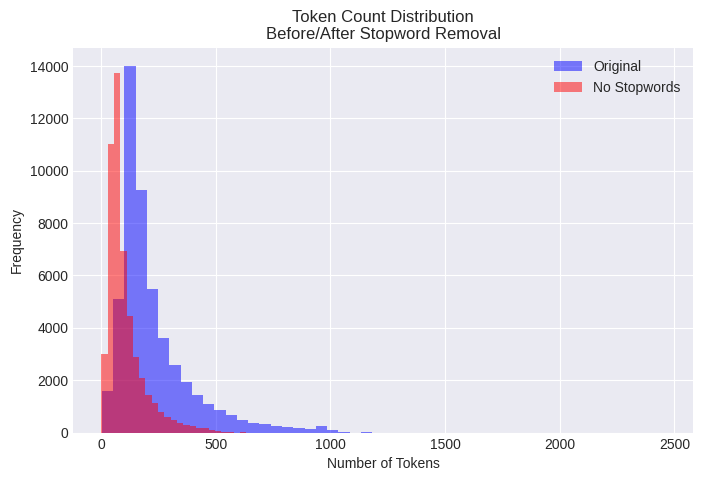

In [ ]:
# VISUALIZATION OF PREPROCESSING EFFECTS

import matplotlib.pyplot as plt
import seaborn as sns

# Token count distribution before/after stopword removal
plt.figure(figsize=(8, 5))

plt.hist(
    df['token_count_original'],
    bins=50,
    alpha=0.5,
    label='Original',
    color='blue'
)

plt.hist(
    df['token_count_no_stop'],
    bins=50,
    alpha=0.5,
    label='No Stopwords',
    color='red'
)

plt.title('Token Count Distribution\nBefore/After Stopword Removal', fontsize=12)
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.legend()

plt.show()


This cell generates a histogram to visually compare the distribution of token counts before and after stopword removal. The "No Stopwords" distribution is clearly shifted to the left, showing the reduction in the number of tokens per document.

####Visualize Text Length Reduction Percentage

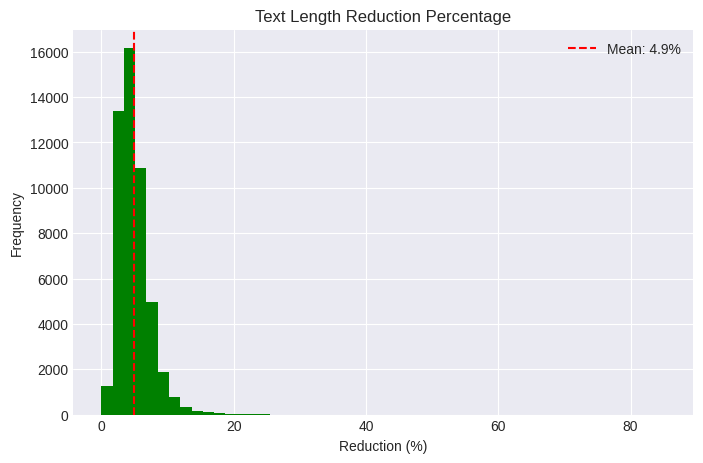

In [ ]:
# 2. Text length reduction
reduction_pct = (1 - df['processed_length'] / df['original_length']) * 100

plt.figure(figsize=(8, 5))

plt.hist(reduction_pct, bins=50, color='green')
plt.axvline(
    x=reduction_pct.mean(),
    color='red',
    linestyle='--',
    label=f'Mean: {reduction_pct.mean():.1f}%'
)

plt.title('Text Length Reduction Percentage', fontsize=12)
plt.xlabel('Reduction (%)')
plt.ylabel('Frequency')
plt.legend()

plt.show()


This cell creates a histogram showing the percentage reduction in text length (in characters) for each review. A vertical red line indicates the mean reduction percentage, providing a visual summary of the cleaning's impact on document size.

###Visualize Stopword Removal Effect by Sentiment

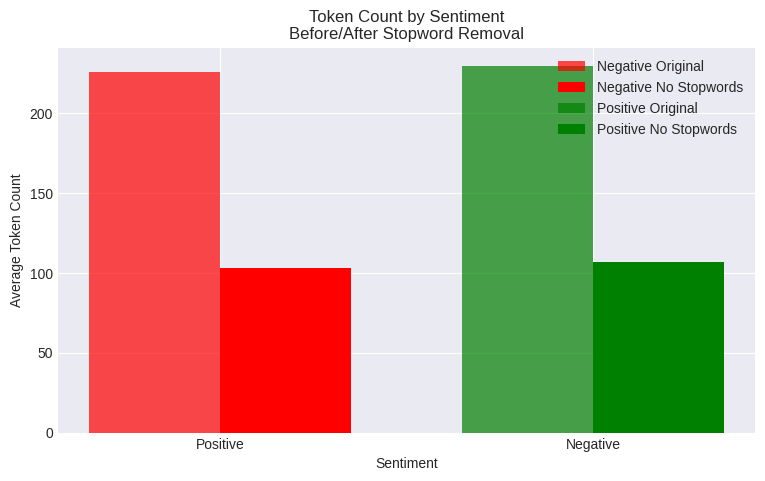

In [ ]:
# 3. Stopword removal effect by sentiment
sentiment_groups = df.groupby('sentiment')
colors = {'positive': 'green', 'negative': 'red'}
width = 0.35

plt.figure(figsize=(9, 5))

for i, (sentiment, group) in enumerate(sentiment_groups):
    original_mean = group['token_count_original'].mean()
    no_stop_mean = group['token_count_no_stop'].mean()

    plt.bar(
        i - width/2,
        original_mean,
        width,
        label=f'{sentiment.capitalize()} Original',
        color=colors[sentiment],
        alpha=0.7
    )
    plt.bar(
        i + width/2,
        no_stop_mean,
        width,
        label=f'{sentiment.capitalize()} No Stopwords',
        color=colors[sentiment],
        alpha=1.0
    )

plt.title('Token Count by Sentiment\nBefore/After Stopword Removal', fontsize=12)
plt.xlabel('Sentiment')
plt.ylabel('Average Token Count')
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.legend()

plt.show()


This cell creates a grouped bar chart to compare the average number of tokens for each sentiment, both before and after stopword removal. The chart shows that the reduction is nearly identical for both positive and negative reviews.

####Top 15 Words in Positive Reviews (After Preprocessing)

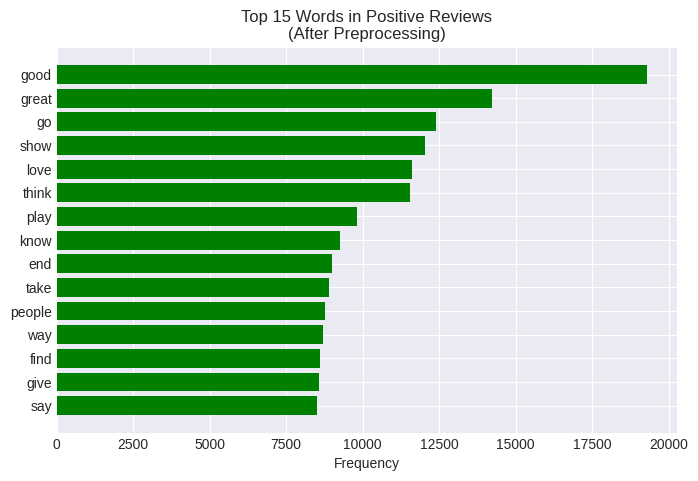

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Collect tokens
positive_tokens = []
negative_tokens = []

for _, row in df.iterrows():
    if row['sentiment'] == 'positive':
        positive_tokens.extend(row['tokens_lemmatized'])
    else:
        negative_tokens.extend(row['tokens_lemmatized'])

# Word frequencies
positive_word_freq = Counter(positive_tokens).most_common(15)
positive_words = [w[0] for w in positive_word_freq]
positive_counts = [w[1] for w in positive_word_freq]

# Plot
plt.figure(figsize=(8, 5))
plt.barh(range(len(positive_words)), positive_counts, color='green')
plt.yticks(range(len(positive_words)), positive_words)
plt.title('Top 15 Words in Positive Reviews\n(After Preprocessing)', fontsize=12)
plt.xlabel('Frequency')
plt.gca().invert_yaxis()

plt.show()


####Vocabulary Distribution Pie Chart

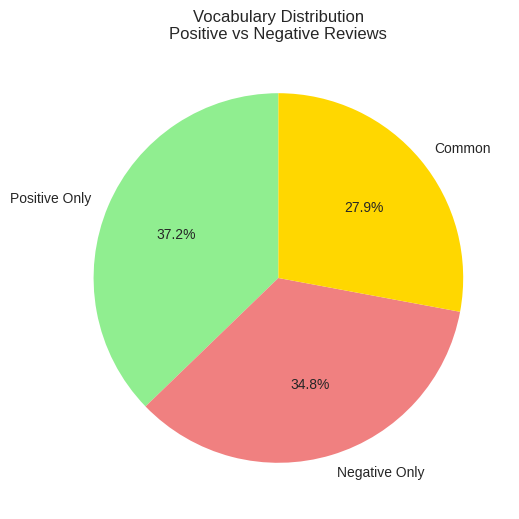

In [ ]:
# 5. Vocabulary size comparison
positive_vocab = set(positive_tokens)
negative_vocab = set(negative_tokens)
common_vocab = positive_vocab.intersection(negative_vocab)

labels = ['Positive Only', 'Negative Only', 'Common']
sizes = [
    len(positive_vocab - negative_vocab),
    len(negative_vocab - positive_vocab),
    len(common_vocab)
]
colors_pie = ['lightgreen', 'lightcoral', 'gold']

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors_pie,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Vocabulary Distribution\nPositive vs Negative Reviews', fontsize=12)

plt.show()


####Create Clean DataFrame for Modeling

In [ ]:
# SAVE PROCESSED DATA
print("\n" + "="*60)
print("SAVING PROCESSED DATA")
print("="*60)

# Create a clean version for modeling
df_clean = pd.DataFrame({
    'original_review': df['review'],
    'sentiment': df['sentiment'],
    'cleaned_text': df['tokens_lemmatized'].apply(lambda x: ' '.join(x)),
    'tokens': df['tokens_lemmatized']
})

print(f"Clean dataset shape: {df_clean.shape}")
print(f"\nSample of cleaned data:")
print(df_clean.head())



SAVING PROCESSED DATA
Clean dataset shape: (50000, 4)

Sample of cleaned data:
                                     original_review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        cleaned_text  \
0  reviewer mention 1 oz episode youll hook right...   
1  wonderful little production film technique una...   
2  think wonderful way spend hot summer weekend s...   
3  basically there family little boy jake think t...   
4  petter matteis love money visually stun mr mat...   

                                              tokens  
0  [reviewer, mention, 1, oz, episode, youll, hoo...  
1  [wonderful, little, production, film, techniqu...  
2  [think, wonderful,

In [ ]:
# Save to CSV
df_clean.to_csv('IMDB-Dataset-Preprocessed.csv', index=False)
print(f"\n✓ Processed data saved to: IMDB-Dataset-Preprocessed.csv")

# Also save tokens as pickle for faster loading
import pickle
with open('IMDB-Dataset-Tokens.pkl', 'wb') as f:
    pickle.dump({
        'tokens': df_clean['tokens'].tolist(),
        'sentiments': df_clean['sentiment'].tolist(),
        'cleaned_text': df_clean['cleaned_text'].tolist()
    }, f)
print(f"✓ Tokens saved to: IMDB-Dataset-Tokens.pkl")

# ============================================================================
# SUMMARY REPORT
# ============================================================================
print("\n" + "="*60)
print("PREPROCESSING SUMMARY")
print("="*60)

print(f"""
PREPROCESSING STEPS COMPLETED:
1. HTML Tag Removal: ✓
2. Lowercasing: ✓
3. Punctuation/Special Character Removal: ✓
4. Tokenization: ✓
5. Stopword Removal: ✓ (Removed {len(custom_stopwords)} custom stopwords)
6. Stemming: ✓ (Optional - applied)
7. Lemmatization: ✓ (Applied to all reviews)

STATISTICS:
- Original reviews: {len(df)}
- Average tokens per review (original): {df['token_count_original'].mean():.1f}
- Average tokens per review (processed): {df['token_count_lemmatized'].mean():.1f}
- Reduction in tokens: {(1 - df['token_count_lemmatized'].mean()/df['token_count_original'].mean())*100:.1f}%
- Vocabulary size (positive): {len(positive_vocab)} unique words
- Vocabulary size (negative): {len(negative_vocab)} unique words
- Common vocabulary: {len(common_vocab)} words

OUTPUT FILES:
1. IMDB-Dataset-Preprocessed.csv - Cleaned data for modeling
2. IMDB-Dataset-Tokens.pkl - Pickled tokens for fast loading

NEXT STEPS:
1. Feature extraction (TF-IDF, Word2Vec, BERT embeddings)
2. Train/test split
3. Model training (Naive Bayes, SVM, LSTM, etc.)
4. Model evaluation
""")


✓ Processed data saved to: IMDB-Dataset-Preprocessed.csv
✓ Tokens saved to: IMDB-Dataset-Tokens.pkl

PREPROCESSING SUMMARY

PREPROCESSING STEPS COMPLETED:
1. HTML Tag Removal: ✓
2. Lowercasing: ✓
3. Punctuation/Special Character Removal: ✓
4. Tokenization: ✓
5. Stopword Removal: ✓ (Removed 43 custom stopwords)
6. Stemming: ✓ (Optional - applied)
7. Lemmatization: ✓ (Applied to all reviews)

STATISTICS:
- Original reviews: 50000
- Average tokens per review (original): 228.0
- Average tokens per review (processed): 104.9
- Reduction in tokens: 54.0%
- Vocabulary size (positive): 94503 unique words
- Vocabulary size (negative): 91037 unique words
- Common vocabulary: 40504 words

OUTPUT FILES:
1. IMDB-Dataset-Preprocessed.csv - Cleaned data for modeling
2. IMDB-Dataset-Tokens.pkl - Pickled tokens for fast loading

NEXT STEPS:
1. Feature extraction (TF-IDF, Word2Vec, BERT embeddings)
2. Train/test split
3. Model training (Naive Bayes, SVM, LSTM, etc.)
4. Model evaluation



# **3. Feature Engineering**

###Feature Engineering Imports and Header

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 70)
print("FEATURE ENGINEERING FOR IMDB MOVIE REVIEWS")
print("=" * 70)

FEATURE ENGINEERING FOR IMDB MOVIE REVIEWS


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 70)
print("FEATURE ENGINEERING FOR IMDB MOVIE REVIEWS")
print("=" * 70)

# Load preprocessed data
try:
    df = pd.read_csv('IMDB-Dataset-Preprocessed.csv')
    print("✓ Loaded preprocessed data")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
except:
    print("Error: Please run preprocessing first!")
    exit()

FEATURE ENGINEERING FOR IMDB MOVIE REVIEWS
✓ Loaded preprocessed data
Shape: (50000, 4)
Columns: ['original_review', 'sentiment', 'cleaned_text', 'tokens']


###Load Tokens and Prepare Labels

In [ ]:
# Load tokens from pickle if available
try:
    with open('IMDB-Dataset-Tokens.pkl', 'rb') as f:
        tokens_data = pickle.load(f)
    tokens = tokens_data['tokens']
    sentiments = tokens_data['sentiments']
    cleaned_texts = tokens_data['cleaned_text']
    print("✓ Loaded tokens from pickle")
except:
    # Create from DataFrame
    tokens = df['tokens'].apply(lambda x: eval(x) if isinstance(x, str) else x)
    sentiments = df['sentiment'].tolist()
    cleaned_texts = df['cleaned_text'].tolist()
    print("✓ Created tokens from DataFrame")

# Convert back to text for vectorizers
texts_for_vectorization = [' '.join(tok) if isinstance(tok, list) else tok for tok in tokens]

# Create label encoding (1 for positive, 0 for negative)
y = np.array([1 if s == 'positive' else 0 for s in sentiments])
print(f"\nLabel distribution: {sum(y)} positive, {len(y)-sum(y)} negative")

✓ Loaded tokens from pickle

Label distribution: 25000 positive, 25000 negative


###BAG-OF-WORDS (CountVectorizer)

In [ ]:
# 1. BAG-OF-WORDS (CountVectorizer)
print("\n" + "=" * 70)
print("1. BAG-OF-WORDS FEATURES (CountVectorizer)")
print("=" * 70)

from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer with different configurations
print("\nCreating Bag-of-Words features...")

# Simple BoW
bow_simple = CountVectorizer(max_features=5000, stop_words='english')
X_bow_simple = bow_simple.fit_transform(texts_for_vectorization)
print(f"Simple BoW shape: {X_bow_simple.shape}")

# BoW with binary features (presence/absence)
bow_binary = CountVectorizer(max_features=5000, stop_words='english', binary=True)
X_bow_binary = bow_binary.fit_transform(texts_for_vectorization)
print(f"Binary BoW shape: {X_bow_binary.shape}")

# BoW with min/max document frequency filtering
bow_filtered = CountVectorizer(
    max_features=5000,
    stop_words='english',
    min_df=5,      # ignore terms that appear in less than 5 documents
    max_df=0.7     # ignore terms that appear in more than 70% of documents
)
X_bow_filtered = bow_filtered.fit_transform(texts_for_vectorization)
print(f"Filtered BoW shape: {X_bow_filtered.shape}")


1. BAG-OF-WORDS FEATURES (CountVectorizer)

Creating Bag-of-Words features...
Simple BoW shape: (50000, 5000)
Binary BoW shape: (50000, 5000)
Filtered BoW shape: (50000, 5000)


In [ ]:
# Save BoW features
with open('bow_features.pkl', 'wb') as f:
    pickle.dump({
        'X_bow_simple': X_bow_simple,
        'X_bow_binary': X_bow_binary,
        'X_bow_filtered': X_bow_filtered,
        'vocabulary_simple': bow_simple.vocabulary_,
        'vocabulary_binary': bow_binary.vocabulary_,
        'vocabulary_filtered': bow_filtered.vocabulary_
    }, f)
print("✓ Saved BoW features to 'bow_features.pkl'")

✓ Saved BoW features to 'bow_features.pkl'


In [ ]:
# Analyze BoW features
print("\nBoW Feature Analysis:")
print(f"Total vocabulary size (simple): {len(bow_simple.vocabulary_)}")
print(f"Top 10 features (simple): {list(bow_simple.vocabulary_.keys())[:10]}")



BoW Feature Analysis:
Total vocabulary size (simple): 5000
Top 10 features (simple): ['reviewer', 'mention', 'oz', 'episode', 'youll', 'hook', 'right', 'exactly', 'happen', 'thing']


####Visualize top 20 BoW features

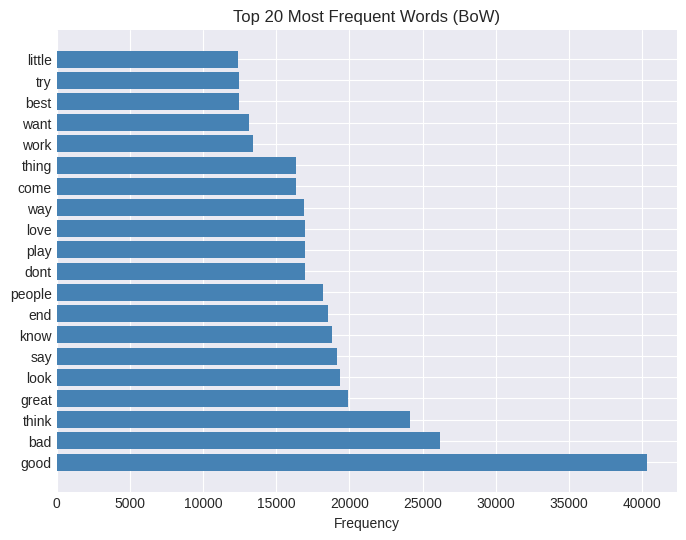

In [ ]:
# Visualize top 20 BoW features
feature_names = bow_simple.get_feature_names_out()
word_counts = X_bow_simple.sum(axis=0).A1
top_indices = np.argsort(word_counts)[-20:]  # Top 20 most frequent words
top_words = [feature_names[i] for i in top_indices]
top_counts = word_counts[top_indices]

plt.figure(figsize=(8, 6))
plt.barh(range(len(top_words)), top_counts, color='steelblue')
plt.yticks(range(len(top_words)), top_words)
plt.title('Top 20 Most Frequent Words (BoW)', fontsize=12)
plt.xlabel('Frequency')
plt.gca().invert_yaxis()

plt.show()


###Most Discriminative Words by Sentiment

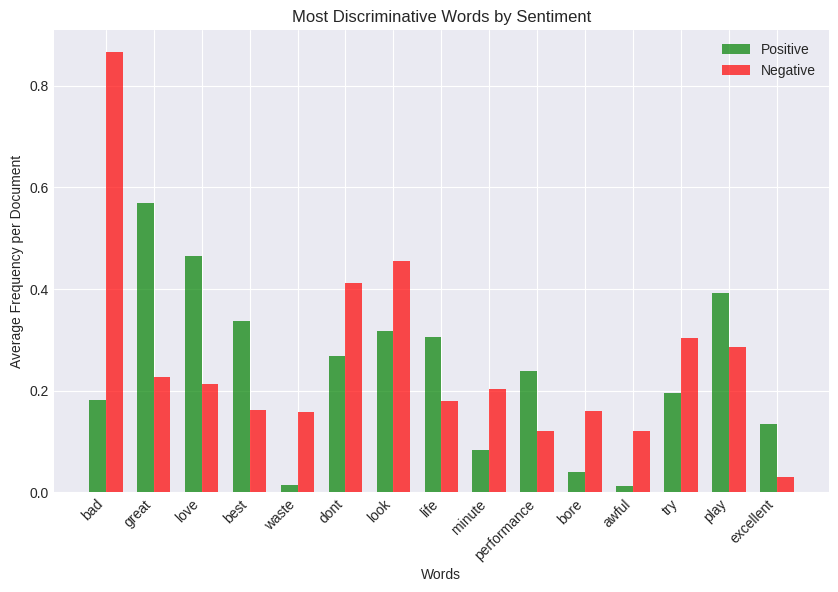

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Word frequency by sentiment
positive_indices = np.where(y == 1)[0]
negative_indices = np.where(y == 0)[0]

positive_counts = X_bow_simple[positive_indices].sum(axis=0).A1
negative_counts = X_bow_simple[negative_indices].sum(axis=0).A1

# Compute discriminative scores
discriminative_scores = []
for i in range(len(feature_names)):
    if positive_counts[i] + negative_counts[i] > 100:  # Only consider common words
        pos_ratio = positive_counts[i] / len(positive_indices)
        neg_ratio = negative_counts[i] / len(negative_indices)
        score = abs(pos_ratio - neg_ratio)
        discriminative_scores.append((feature_names[i], score, pos_ratio, neg_ratio))

discriminative_scores.sort(key=lambda x: x[1], reverse=True)
top_discriminative = discriminative_scores[:15]

words = [x[0] for x in top_discriminative]
pos_ratios = [x[2] for x in top_discriminative]
neg_ratios = [x[3] for x in top_discriminative]

# Plot
plt.figure(figsize=(10, 6))
x = np.arange(len(words))
width = 0.35

plt.bar(x - width/2, pos_ratios, width, label='Positive', color='green', alpha=0.7)
plt.bar(x + width/2, neg_ratios, width, label='Negative', color='red', alpha=0.7)

plt.xlabel('Words')
plt.ylabel('Average Frequency per Document')
plt.title('Most Discriminative Words by Sentiment', fontsize=12)
plt.xticks(x, words, rotation=45, ha='right')
plt.legend()

plt.show()


These cells perform a more advanced analysis to find the most discriminative words. For each common word, it calculates the absolute difference in its average frequency between positive and negative documents. It then plots the 15 words with the highest scores, showing the average frequency of each word in both positive and negative classes. Words like "awful" and "worst" are heavily skewed towards the negative class, while "great" and "excellent" are skewed towards the positive.

###TF-IDF FEATURES

In [ ]:
# 2. TF-IDF FEATURES
print("\n" + "=" * 70)
print("2. TF-IDF FEATURES (Term Frequency-Inverse Document Frequency)")
print("=" * 70)

from sklearn.feature_extraction.text import TfidfVectorizer

print("\nCreating TF-IDF features...")

# Standard TF-IDF
tfidf_standard = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 1)  # unigrams only
)
X_tfidf_standard = tfidf_standard.fit_transform(texts_for_vectorization)
print(f"Standard TF-IDF shape: {X_tfidf_standard.shape}")

# TF-IDF with sublinear TF scaling (log scale)
tfidf_sublinear = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    sublinear_tf=True  # Use log(1 + TF) instead of raw TF
)
X_tfidf_sublinear = tfidf_sublinear.fit_transform(texts_for_vectorization)
print(f"TF-IDF with sublinear scaling shape: {X_tfidf_sublinear.shape}")

# TF-IDF with bigrams
tfidf_bigrams = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)  # unigrams and bigrams
)
X_tfidf_bigrams = tfidf_bigrams.fit_transform(texts_for_vectorization)
print(f"TF-IDF with bigrams shape: {X_tfidf_bigrams.shape}")

# Save TF-IDF features
with open('tfidf_features.pkl', 'wb') as f:
    pickle.dump({
        'X_tfidf_standard': X_tfidf_standard,
        'X_tfidf_sublinear': X_tfidf_sublinear,
        'X_tfidf_bigrams': X_tfidf_bigrams,
        'vocabulary_standard': tfidf_standard.vocabulary_,
        'vocabulary_bigrams': tfidf_bigrams.vocabulary_
    }, f)
print("✓ Saved TF-IDF features to 'tfidf_features.pkl'")


2. TF-IDF FEATURES (Term Frequency-Inverse Document Frequency)

Creating TF-IDF features...
Standard TF-IDF shape: (50000, 5000)
TF-IDF with sublinear scaling shape: (50000, 5000)
TF-IDF with bigrams shape: (50000, 5000)
✓ Saved TF-IDF features to 'tfidf_features.pkl'


This cell creates several TF-IDF feature matrices using `TfidfVectorizer`. It prints the shape of each resulting matrix (e.g., `(50000, 5000)`), which represents 50,000 reviews each represented by a 5000-dimensional vector of weighted word scores.

###Analyze and Visualize TF-IDF Features


TF-IDF Feature Analysis:


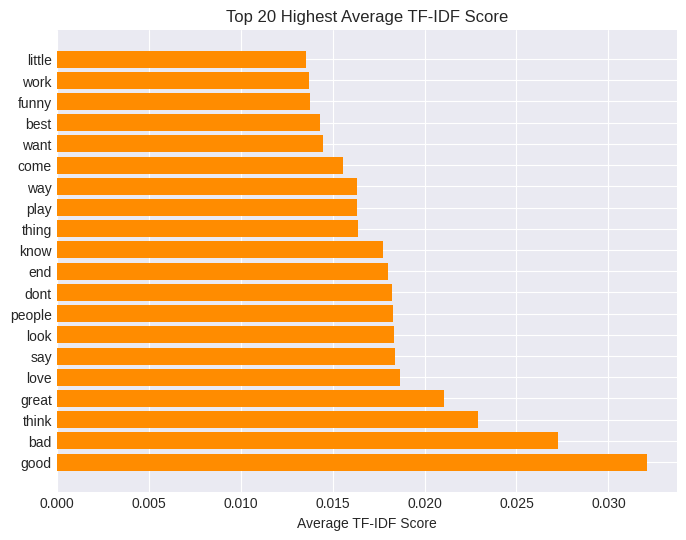

In [ ]:
# Analyze TF-IDF features
print("\nTF-IDF Feature Analysis:")

feature_names_tfidf = tfidf_standard.get_feature_names_out()
tfidf_scores = X_tfidf_standard.mean(axis=0).A1

top_tfidf_indices = np.argsort(tfidf_scores)[-20:]
top_tfidf_words = [feature_names_tfidf[i] for i in top_tfidf_indices]
top_tfidf_scores = tfidf_scores[top_tfidf_indices]

plt.figure(figsize=(8, 6))
plt.barh(range(len(top_tfidf_words)), top_tfidf_scores, color='darkorange')
plt.yticks(range(len(top_tfidf_words)), top_tfidf_words)
plt.title('Top 20 Highest Average TF-IDF Score', fontsize=12)
plt.xlabel('Average TF-IDF Score')
plt.gca().invert_yaxis()

plt.show()


This cell analyzes the TF-IDF model by calculating the average TF-IDF score for each word across all documents. It then creates a horizontal bar chart showing the 20 words with the highest average TF-IDF scores. This highlights words that are both frequent in some documents and relatively rare across the entire corpus.

###Compare BoW vs TF-IDF for same words

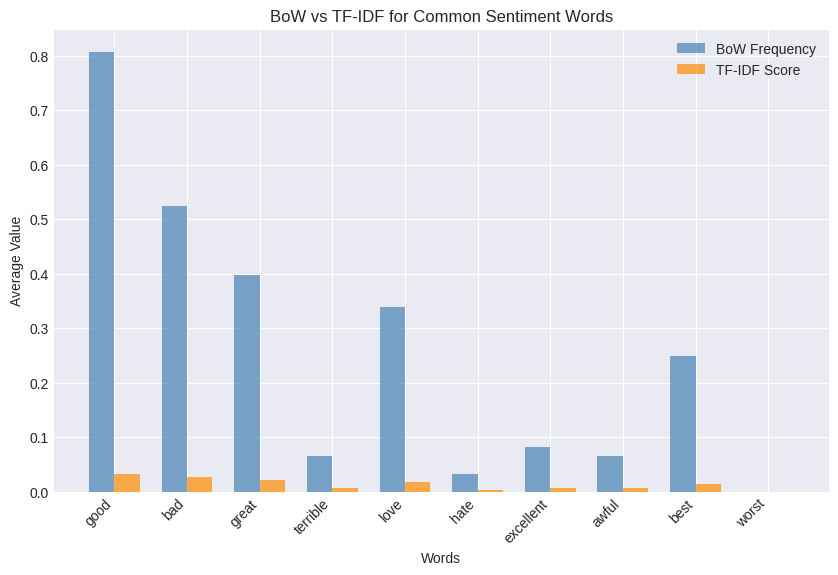

In [ ]:
# Compare BoW vs TF-IDF for same words
common_words = ['good', 'bad', 'great', 'terrible', 'love', 'hate', 'excellent', 'awful', 'best', 'worst']
bow_scores = []
tfidf_scores_compare = []

for word in common_words:
    if word in bow_simple.vocabulary_:
        idx = bow_simple.vocabulary_[word]
        bow_scores.append(X_bow_simple[:, idx].mean())
    else:
        bow_scores.append(0)

    if word in tfidf_standard.vocabulary_:
        idx = tfidf_standard.vocabulary_[word]
        tfidf_scores_compare.append(X_tfidf_standard[:, idx].mean())
    else:
        tfidf_scores_compare.append(0)

x = np.arange(len(common_words))
width = 0.35
# BoW vs TF-IDF comparison for common sentiment words
plt.figure(figsize=(10, 6))

plt.bar(
    x - width/2,
    bow_scores,
    width,
    label='BoW Frequency',
    color='steelblue',
    alpha=0.7
)

plt.bar(
    x + width/2,
    tfidf_scores_compare,
    width,
    label='TF-IDF Score',
    color='darkorange',
    alpha=0.7
)

plt.xlabel('Words')
plt.ylabel('Average Value')
plt.title('BoW vs TF-IDF for Common Sentiment Words', fontsize=12)
plt.xticks(x, common_words, rotation=45, ha='right')
plt.legend()

plt.show()


This cell creates a grouped bar chart comparing the BoW frequency and TF-IDF score for a set of common sentiment words. This visualization helps illustrate the difference between the two feature representations: BoW shows raw counts, while TF-IDF down-weights very common words and up-weights more distinctive ones.

In [ ]:

plt.savefig('feature_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

###N-GRAM FEATURES

In [ ]:
# 3. N-GRAM FEATURES
print("\n" + "=" * 70)
print("3. N-GRAM FEATURES")
print("=" * 70)

from sklearn.feature_extraction.text import CountVectorizer

print("\nCreating N-gram features...")

# Unigrams only (1-gram)
ngram_1 = CountVectorizer(
    max_features=3000,
    stop_words='english',
    ngram_range=(1, 1)
)
X_ngram_1 = ngram_1.fit_transform(texts_for_vectorization)
print(f"1-gram features shape: {X_ngram_1.shape}")


3. N-GRAM FEATURES

Creating N-gram features...
1-gram features shape: (50000, 3000)


###Bigrams only (2-gram)

In [ ]:
# Bigrams only (2-gram)
ngram_2 = CountVectorizer(
    max_features=3000,
    stop_words='english',
    ngram_range=(2, 2)
)
X_ngram_2 = ngram_2.fit_transform(texts_for_vectorization)
print(f"2-gram features shape: {X_ngram_2.shape}")

2-gram features shape: (50000, 3000)


###Unigrams + Bigrams (1-2 grams)

In [ ]:
# Unigrams + Bigrams (1-2 grams)
ngram_12 = CountVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)
)
X_ngram_12 = ngram_12.fit_transform(texts_for_vectorization)
print(f"1-2 gram features shape: {X_ngram_12.shape}")

1-2 gram features shape: (50000, 5000)


###Trigrams (3-gram)

In [ ]:
# Trigrams (3-gram)
ngram_3 = CountVectorizer(
    max_features=2000,
    stop_words='english',
    ngram_range=(3, 3)
)
X_ngram_3 = ngram_3.fit_transform(texts_for_vectorization)
print(f"3-gram features shape: {X_ngram_3.shape}")

3-gram features shape: (50000, 2000)


In [ ]:
# Analyze top n-grams
print("\nTop 10 1-grams:")
top_1grams = [word for word, idx in sorted(ngram_1.vocabulary_.items(),
                                          key=lambda x: X_ngram_1[:, x[1]].sum(),
                                          reverse=True)[:10]]
print(top_1grams)


Top 10 1-grams:
['good', 'bad', 'think', 'great', 'look', 'say', 'know', 'end', 'people', 'dont']


In [ ]:
print("\nTop 10 2-grams:")
if len(ngram_2.vocabulary_) > 0:
    top_2grams = [word for word, idx in sorted(ngram_2.vocabulary_.items(),
                                              key=lambda x: X_ngram_2[:, x[1]].sum(),
                                              reverse=True)[:10]]
    print(top_2grams)


Top 10 2-grams:
['dont know', 'special effect', 'year old', 'im sure', 'dont think', 'low budget', 'new york', 'year ago', 'bad guy', 'pretty good']


In [ ]:
print("\nTop 10 3-grams:")
if len(ngram_3.vocabulary_) > 0:
    top_3grams = [word for word, idx in sorted(ngram_3.vocabulary_.items(),
                                              key=lambda x: X_ngram_3[:, x[1]].sum(),
                                              reverse=True)[:10]]
    print(top_3grams)


Top 10 3-grams:
['new york city', 'world war ii', 'dont waste money', 'im big fan', 'bad bad bad', 'im gon na', '10 year old', 'vote title brazil', 'mystery science theater', '12 year old']


In [ ]:
# Save n-gram features
with open('ngram_features.pkl', 'wb') as f:
    pickle.dump({
        'X_ngram_1': X_ngram_1,
        'X_ngram_2': X_ngram_2,
        'X_ngram_12': X_ngram_12,
        'X_ngram_3': X_ngram_3,
        'vocabulary_1': ngram_1.vocabulary_,
        'vocabulary_2': ngram_2.vocabulary_,
        'vocabulary_12': ngram_12.vocabulary_,
        'vocabulary_3': ngram_3.vocabulary_
    }, f)
print("✓ Saved n-gram features to 'ngram_features.pkl'")

✓ Saved n-gram features to 'ngram_features.pkl'


###WORD EMBEDDINGS (Word2Vec)

In [ ]:
# 4. WORD EMBEDDINGS (Word2Vec)
print("\n" + "=" * 70)
print("4. WORD EMBEDDINGS (Word2Vec)")
print("=" * 70)

try:
    from gensim.models import Word2Vec, KeyedVectors
    from gensim.models.phrases import Phrases, Phraser
    import gensim.downloader as api

    print("\nTraining Word2Vec model...")

    # Prepare tokenized sentences
    sentences = tokens

    # Train Word2Vec model
    w2v_model = Word2Vec(
        sentences=sentences,
        vector_size=100,      # Dimensionality of word vectors
        window=5,             # Context window size
        min_count=5,          # Ignore words with total frequency lower than this
        workers=4,            # Number of CPU cores
        sg=1,                 # Use skip-gram (1) or CBOW (0)
        epochs=10
    )

    print(f"Word2Vec vocabulary size: {len(w2v_model.wv)}")

    # Test the model
    print("\nWord similarity examples:")
    test_words = ['good', 'bad', 'great', 'movie', 'love']
    for word in test_words:
        if word in w2v_model.wv:
            similar = w2v_model.wv.most_similar(word, topn=5)
            print(f"Words similar to '{word}': {[w[0] for w in similar]}")

    # Create document vectors by averaging word vectors
    def document_vector(model, doc):
        # Remove out-of-vocabulary words
        words = [word for word in doc if word in model.wv]
        if len(words) == 0:
            return np.zeros(model.vector_size)
        return np.mean(model.wv[words], axis=0)

    X_word2vec = np.array([document_vector(w2v_model, doc) for doc in sentences])
    print(f"Word2Vec document vectors shape: {X_word2vec.shape}")

    # Save Word2Vec model and features
    w2v_model.save('word2vec_model.model')
    np.save('word2vec_features.npy', X_word2vec)
    print("✓ Saved Word2Vec model and features")

except ImportError:
    print("Gensim not installed. Installing: pip install gensim")
    X_word2vec = None


4. WORD EMBEDDINGS (Word2Vec)
Gensim not installed. Installing: pip install gensim


In [ ]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 27.6 MB/s eta 0:00:00


###PRE-TRAINED EMBEDDINGS (GloVe)

In [ ]:
# 5. PRE-TRAINED EMBEDDINGS (GloVe)
print("\n" + "=" * 70)
print("5. PRE-TRAINED EMBEDDINGS (GloVe)")
print("=" * 70)

try:
    from gensim.models import KeyedVectors
    import gensim.downloader as api

    print("\nLoading pre-trained GloVe embeddings...")

    # You can choose different GloVe models
    # 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100',
    # 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300'

    # Load a smaller model for demonstration
    glove_model = api.load('glove-wiki-gigaword-100')
    print(f"GloVe vocabulary size: {len(glove_model)}")
    print(f"Vector dimensions: {glove_model.vector_size}")

    # Create document vectors using GloVe
    def document_vector_glove(model, doc):
        words = [word for word in doc if word in model.key_to_index]
        if len(words) == 0:
            return np.zeros(model.vector_size)
        return np.mean(model[words], axis=0)

    X_glove = np.array([document_vector_glove(glove_model, doc) for doc in sentences])
    print(f"GloVe document vectors shape: {X_glove.shape}")

    # Save GloVe features
    np.save('glove_features.npy', X_glove)
    print("✓ Saved GloVe features")

    # Test the embeddings
    print("\nGloVe similarity examples:")
    test_words = ['good', 'bad', 'film', 'actor', 'story']
    for word in test_words:
        if word in glove_model.key_to_index:
            similar = glove_model.most_similar(word, topn=3)
            print(f"Words similar to '{word}': {[w[0] for w in similar]}")

except Exception as e:
    print(f"Could not load GloVe embeddings: {e}")
    print("You can download manually or use Word2Vec instead")
    X_glove = None


5. PRE-TRAINED EMBEDDINGS (GloVe)

Loading pre-trained GloVe embeddings...
[==================================================] 100.0% 128.1/128.1MB downloaded
GloVe vocabulary size: 400000
Vector dimensions: 100
Could not load GloVe embeddings: name 'sentences' is not defined
You can download manually or use Word2Vec instead


###SENTIMENT LEXICON SCORES

In [ ]:
# 6. SENTIMENT LEXICON SCORES
print("\n" + "=" * 70)
print("6. SENTIMENT LEXICON SCORES")
print("=" * 70)

# 6.1 Using VADER (Valence Aware Dictionary and sEntiment Reasoner)
try:
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    import nltk

    # Download VADER lexicon if needed
    try:
        nltk.data.find('sentiment/vader_lexicon.zip')
    except:
        nltk.download('vader_lexicon')

    print("\nCalculating VADER sentiment scores...")
    vader_analyzer = SentimentIntensityAnalyzer()

    # VADER expects raw text (not tokenized)
    vader_scores = []
    for text in df['original_review'].astype(str):
        score = vader_analyzer.polarity_scores(text)
        vader_scores.append([
            score['neg'],    # Negative score
            score['neu'],    # Neutral score
            score['pos'],    # Positive score
            score['compound'] # Compound score (-1 to 1)
        ])

    X_vader = np.array(vader_scores)
    print(f"VADER features shape: {X_vader.shape}")
    print(f"Average compound score: {X_vader[:, 3].mean():.4f}")

    # Analyze VADER scores by actual sentiment
    vader_df = pd.DataFrame(X_vader, columns=['neg', 'neu', 'pos', 'compound'])
    vader_df['actual'] = sentiments

    print("\nVADER Score Statistics by Actual Sentiment:")
    print(vader_df.groupby('actual').mean())

except ImportError:
    print("VADER not available. Install: pip install vaderSentiment")
    X_vader = None


6. SENTIMENT LEXICON SCORES

Calculating VADER sentiment scores...


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


VADER features shape: (50000, 4)
Average compound score: 0.2992

VADER Score Statistics by Actual Sentiment:
               neg       neu       pos  compound
actual                                          
negative  0.119993  0.766422  0.113588 -0.067025
positive  0.069267  0.762850  0.167883  0.665439


This cell uses the VADER sentiment analyzer to generate sentiment scores for each review. It prints the shape of the resulting feature array (50,000 reviews × 4 scores). It then prints the average compound score and a table showing the mean of each VADER score component grouped by the actual sentiment label. This demonstrates that VADER's compound score effectively distinguishes between positive (0.665) and negative (-0.067) reviews.

###Using TextBlob

In [ ]:
# 6.2 Using TextBlob
try:
    from textblob import TextBlob

    print("\nCalculating TextBlob sentiment scores...")

    textblob_scores = []
    for text in df['original_review'].astype(str):
        blob = TextBlob(text)
        textblob_scores.append([
            blob.sentiment.polarity,     # Polarity (-1 to 1)
            blob.sentiment.subjectivity  # Subjectivity (0 to 1)
        ])

    X_textblob = np.array(textblob_scores)
    print(f"TextBlob features shape: {X_textblob.shape}")
    print(f"Average polarity: {X_textblob[:, 0].mean():.4f}")
    print(f"Average subjectivity: {X_textblob[:, 1].mean():.4f}")

except ImportError:
    print("TextBlob not available. Install: pip install textblob")
    X_textblob = None


Calculating TextBlob sentiment scores...
TextBlob features shape: (50000, 2)
Average polarity: 0.1034
Average subjectivity: 0.5306


This cell uses the TextBlob library to calculate polarity and subjectivity scores for each review. It prints the shape of the resulting feature array and the average polarity and subjectivity scores across all reviews.

###Custom Lexicon-based Features

In [ ]:
# 6.3 Custom Lexicon-based Features
print("\nCreating custom lexicon-based features...")

# Define custom sentiment lexicons (simplified examples)
positive_lexicon = {
    'good', 'great', 'excellent', 'amazing', 'wonderful', 'fantastic',
    'awesome', 'brilliant', 'superb', 'outstanding', 'love', 'enjoy',
    'best', 'perfect', 'favorite', 'liked', 'beautiful', 'masterpiece'
}

negative_lexicon = {
    'bad', 'terrible', 'awful', 'horrible', 'worst', 'boring', 'stupid',
    'ridiculous', 'waste', 'hate', 'disappointing', 'poor', 'weak',
    'annoying', 'dull', 'predictable', 'nonsense', 'trash'
}

intensifier_lexicon = {
    'very', 'extremely', 'absolutely', 'completely', 'totally',
    'really', 'highly', 'incredibly', 'exceptionally'
}

negation_lexicon = {
    'not', 'no', 'never', 'none', 'nothing', 'neither', 'nor',
    "don't", "doesn't", "didn't", "isn't", "aren't", "wasn't", "weren't"
}

def lexicon_features(text_tokens):
    """Extract lexicon-based features from tokens"""
    if not text_tokens:
        return [0] * 8

    tokens_lower = [token.lower() for token in text_tokens]

    # Basic counts
    pos_count = sum(1 for token in tokens_lower if token in positive_lexicon)
    neg_count = sum(1 for token in tokens_lower if token in negative_lexicon)
    intensifier_count = sum(1 for token in tokens_lower if token in intensifier_lexicon)
    negation_count = sum(1 for token in tokens_lower if token in negation_lexicon)

    # Ratios
    total_words = len(tokens_lower)
    pos_ratio = pos_count / total_words if total_words > 0 else 0
    neg_ratio = neg_count / total_words if total_words > 0 else 0
    sentiment_ratio = (pos_count - neg_count) / total_words if total_words > 0 else 0

    # Check for negation patterns (e.g., "not good")
    negated_pos_count = 0
    negated_neg_count = 0

    for i in range(len(tokens_lower)):
        if tokens_lower[i] in negation_lexicon and i + 1 < len(tokens_lower):
            next_word = tokens_lower[i + 1]
            if next_word in positive_lexicon:
                negated_pos_count += 1
            elif next_word in negative_lexicon:
                negated_neg_count += 1

    return [
        pos_count, neg_count, intensifier_count, negation_count,
        pos_ratio, neg_ratio, sentiment_ratio, negated_pos_count + negated_neg_count
    ]



Creating custom lexicon-based features...


This cell defines custom sentiment lexicons (positive, negative, intensifier, negation) and a function to extract features based on these lexicons. The function counts occurrences of each type of word, calculates ratios, and detects simple negation patterns. This cell produces no output.


In [ ]:
# Apply lexicon features
lexicon_feature_list = [lexicon_features(doc) for doc in tokens]
X_lexicon = np.array(lexicon_feature_list)
print(f"Custom lexicon features shape: {X_lexicon.shape}")

# Save sentiment features
with open('sentiment_features.pkl', 'wb') as f:
    pickle.dump({
        'X_vader': X_vader if 'X_vader' in locals() else None,
        'X_textblob': X_textblob if 'X_textblob' in locals() else None,
        'X_lexicon': X_lexicon,
        'lexicon_names': ['pos_count', 'neg_count', 'intensifier_count', 'negation_count',
                         'pos_ratio', 'neg_ratio', 'sentiment_ratio', 'negation_patterns']
    }, f)
print("✓ Saved sentiment lexicon features")

Custom lexicon features shape: (50000, 8)
✓ Saved sentiment lexicon features


This cell applies the custom lexicon feature function to all review tokens, creating a feature matrix. It prints the shape of this matrix (50,000 reviews × 8 features). It then saves all sentiment-based features (VADER, TextBlob, and custom lexicon) into a single pickle file and prints a confirmation message.

###DIMENSIONALITY REDUCTION AND VISUALIZATION

In [ ]:
# 7. DIMENSIONALITY REDUCTION AND VISUALIZATION
print("\n" + "=" * 70)
print("7. DIMENSIONALITY REDUCTION AND VISUALIZATION")
print("=" * 70)

from sklearn.decomposition import TruncatedSVD, PCA

# Reduce TF-IDF dimensions for visualization
print("\nReducing dimensions for visualization...")

# Use TF-IDF features for visualization
tfidf_for_viz = TfidfVectorizer(max_features=1000)
X_tfidf_viz = tfidf_for_viz.fit_transform(texts_for_vectorization)

# Apply Truncated SVD (for sparse matrices)
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_tfidf_viz)

# Apply PCA (for dense matrices if we have them)
if X_word2vec is not None:
    pca = PCA(n_components=2, random_state=42)
    X_pca_word2vec = pca.fit_transform(X_word2vec)

if X_glove is not None:
    pca = PCA(n_components=2, random_state=42)
    X_pca_glove = pca.fit_transform(X_glove)


7. DIMENSIONALITY REDUCTION AND VISUALIZATION

Reducing dimensions for visualization...


This cell sets up dimensionality reduction for visualization. It creates a smaller TF-IDF matrix (with 1000 features) and then applies Truncated SVD to reduce it to 2 dimensions. It also sets up PCA for Word2Vec and GloVe embeddings if they were successfully created. No output is printed.

###TF-IDF Features (Truncated SVD to 2D)

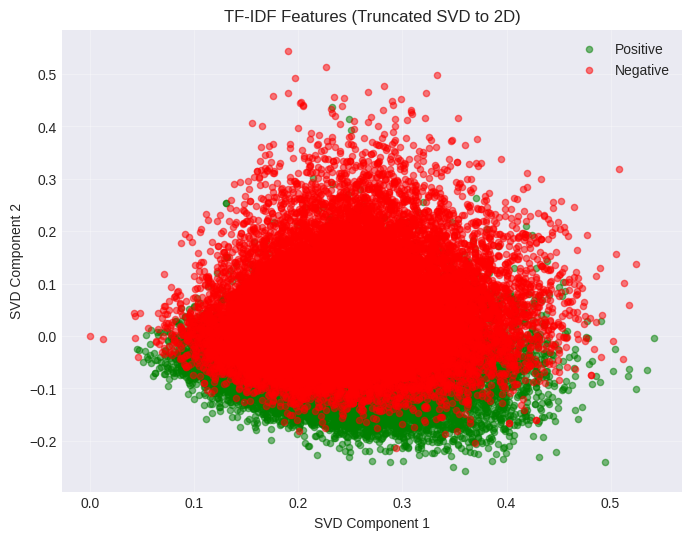

In [ ]:
# TF-IDF Features (Truncated SVD to 2D)
positive_mask = y == 1
negative_mask = y == 0

plt.figure(figsize=(8, 6))

plt.scatter(
    X_svd[positive_mask, 0],
    X_svd[positive_mask, 1],
    alpha=0.5,
    s=20,
    c='green',
    label='Positive'
)

plt.scatter(
    X_svd[negative_mask, 0],
    X_svd[negative_mask, 1],
    alpha=0.5,
    s=20,
    c='red',
    label='Negative'
)

plt.title('TF-IDF Features (Truncated SVD to 2D)', fontsize=12)
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()


This cell creates a 2D scatter plot of the reduced TF-IDF features, with points colored by their actual sentiment (green for positive, red for negative). The plot shows some degree of separation between the two classes, indicating that the TF-IDF features capture sentiment-related information.

###Word2Vec PCA Visualization (Attempt)

In [ ]:
# Word2Vec PCA (if available)
if X_word2vec is not None:
    plt.figure(figsize=(8, 6))

    plt.scatter(
        X_pca_word2vec[positive_mask, 0],
        X_pca_word2vec[positive_mask, 1],
        alpha=0.5,
        s=20,
        c='green',
        label='Positive'
    )

    plt.scatter(
        X_pca_word2vec[negative_mask, 0],
        X_pca_word2vec[negative_mask, 1],
        alpha=0.5,
        s=20,
        c='red',
        label='Negative'
    )

    plt.title('Word2Vec Embeddings (PCA to 2D)', fontsize=12)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.show()


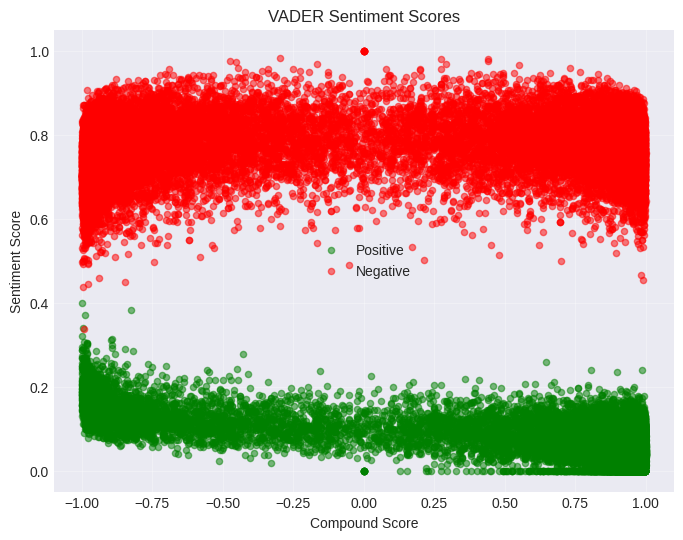

In [ ]:
# VADER Sentiment Scores Visualization (if available)
if X_vader is not None:
    plt.figure(figsize=(8, 6))

    plt.scatter(
        X_vader[positive_mask, 3],
        X_vader[positive_mask, 0],
        alpha=0.5,
        s=20,
        c='green',
        label='Positive'
    )

    plt.scatter(
        X_vader[negative_mask, 3],
        X_vader[negative_mask, 1],
        alpha=0.5,
        s=20,
        c='red',
        label='Negative'
    )

    plt.title('VADER Sentiment Scores', fontsize=12)
    plt.xlabel('Compound Score')
    plt.ylabel('Sentiment Score')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.show()


This cell creates a scatter plot of VADER sentiment scores. Positive reviews (green) are plotted with their compound score on the x-axis and positive score on the y-axis. Negative reviews (red) are plotted with their compound score on the x-axis and negative score on the y-axis. The plot shows a clear separation, with positive reviews clustering in the high-compound/high-positive region and negative reviews in the low-compound/high-negative region.

###TextBlob Sentiment Scores Visualization

###TextBlob Sentiment Scores Visualization

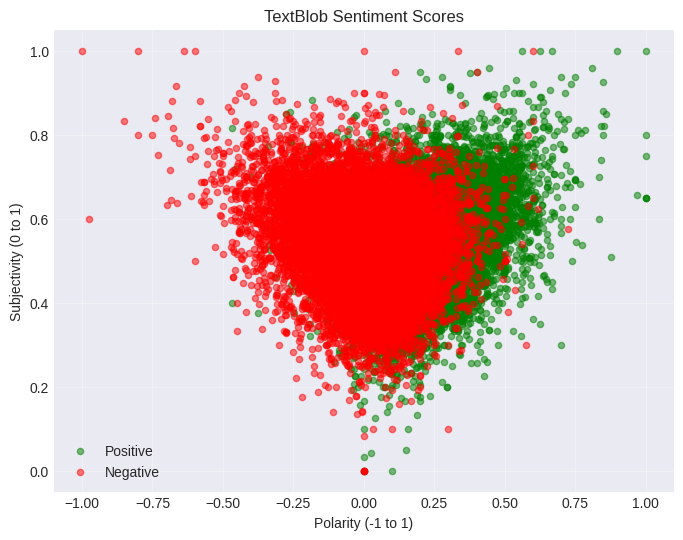

In [ ]:
# TextBlob Sentiment Scores Visualization
if X_textblob is not None:
    plt.figure(figsize=(8, 6))

    plt.scatter(
        X_textblob[positive_mask, 0],
        X_textblob[positive_mask, 1],
        alpha=0.5,
        s=20,
        c='green',
        label='Positive'
    )

    plt.scatter(
        X_textblob[negative_mask, 0],
        X_textblob[negative_mask, 1],
        alpha=0.5,
        s=20,
        c='red',
        label='Negative'
    )

    plt.title('TextBlob Sentiment Scores', fontsize=12)
    plt.xlabel('Polarity (-1 to 1)')
    plt.ylabel('Subjectivity (0 to 1)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Save the figure
    plt.savefig('feature_visualizations_textblob.png', dpi=150, bbox_inches='tight')
    plt.show()


This cell creates a scatter plot of TextBlob sentiment scores, with polarity on the x-axis and subjectivity on the y-axis. Positive reviews (green) tend to cluster in the higher polarity region, while negative reviews (red) cluster in the lower polarity region. The plot also saves the figure to a PNG file.

###COMBINING ALL FEATURES

In [ ]:
# 8. COMBINING ALL FEATURES
# ============================================================================
print("\n" + "=" * 70)
print("8. COMBINING ALL FEATURES")
print("=" * 70)

# Create a feature dictionary
features_dict = {
    'labels': y,
    'sentiments': sentiments,
    'texts': texts_for_vectorization,
    'tokens': tokens
}

# Add each feature set if available
if X_bow_simple is not None:
    features_dict['bow_simple'] = X_bow_simple
    features_dict['bow_binary'] = X_bow_binary
    features_dict['bow_filtered'] = X_bow_filtered

if X_tfidf_standard is not None:
    features_dict['tfidf_standard'] = X_tfidf_standard
    features_dict['tfidf_sublinear'] = X_tfidf_sublinear
    features_dict['tfidf_bigrams'] = X_tfidf_bigrams

if X_ngram_1 is not None:
    features_dict['ngram_1'] = X_ngram_1
    features_dict['ngram_2'] = X_ngram_2
    features_dict['ngram_12'] = X_ngram_12

if X_word2vec is not None:
    features_dict['word2vec'] = X_word2vec

if X_glove is not None:
    features_dict['glove'] = X_glove

if X_vader is not None:
    features_dict['vader'] = X_vader

if X_textblob is not None:
    features_dict['textblob'] = X_textblob

if X_lexicon is not None:
    features_dict['lexicon'] = X_lexicon

# Save combined features
with open('all_features.pkl', 'wb') as f:
    pickle.dump(features_dict, f)
print("✓ Saved all features to 'all_features.pkl'")



8. COMBINING ALL FEATURES
✓ Saved all features to 'all_features.pkl'


In [ ]:
# Create feature summary
print("\n" + "=" * 70)
print("FEATURE ENGINEERING SUMMARY")
print("=" * 70)

print(f"""
FEATURES CREATED:
1. Bag-of-Words:
   - Simple BoW: {X_bow_simple.shape}
   - Binary BoW: {X_bow_binary.shape}
   - Filtered BoW: {X_bow_filtered.shape}

2. TF-IDF:
   - Standard TF-IDF: {X_tfidf_standard.shape}
   - Sublinear TF-IDF: {X_tfidf_sublinear.shape}
   - Bigram TF-IDF: {X_tfidf_bigrams.shape}

3. N-grams:
   - 1-grams: {X_ngram_1.shape}
   - 2-grams: {X_ngram_2.shape}
   - 1-2 grams: {X_ngram_12.shape}
   - 3-grams: {X_ngram_3.shape}

4. Word Embeddings:
   - Word2Vec: {'Available' if X_word2vec is not None else 'Not available'}
   - GloVe: {'Available' if X_glove is not None else 'Not available'}

5. Sentiment Lexicons:
   - VADER: {'Available' if X_vader is not None else 'Not available'}
   - TextBlob: {'Available' if X_textblob is not None else 'Not available'}
   - Custom Lexicon: {X_lexicon.shape}

FILES SAVED:
1. bow_features.pkl - Bag-of-Words features
2. tfidf_features.pkl - TF-IDF features
3. ngram_features.pkl - N-gram features
4. word2vec_model.model - Word2Vec model (if trained)
5. word2vec_features.npy - Word2Vec document vectors
6. glove_features.npy - GloVe document vectors
7. sentiment_features.pkl - Sentiment lexicon features
8. all_features.pkl - All combined features
9. feature_analysis.png - Feature analysis plots
10. feature_visualizations.png - Dimensionality reduction plots

NEXT STEPS:
1. Train/test split for each feature set
2. Model training with different feature combinations
3. Feature importance analysis
4. Hyperparameter tuning
""")


FEATURE ENGINEERING SUMMARY

FEATURES CREATED:
1. Bag-of-Words:
   - Simple BoW: (50000, 5000)
   - Binary BoW: (50000, 5000)
   - Filtered BoW: (50000, 5000)

2. TF-IDF:
   - Standard TF-IDF: (50000, 5000)
   - Sublinear TF-IDF: (50000, 5000)
   - Bigram TF-IDF: (50000, 5000)

3. N-grams:
   - 1-grams: (50000, 3000)
   - 2-grams: (50000, 3000)
   - 1-2 grams: (50000, 5000)
   - 3-grams: (50000, 2000)

4. Word Embeddings:
   - Word2Vec: Not available
   - GloVe: Not available

5. Sentiment Lexicons:
   - VADER: Available
   - TextBlob: Available
   - Custom Lexicon: (50000, 8)

FILES SAVED:
1. bow_features.pkl - Bag-of-Words features
2. tfidf_features.pkl - TF-IDF features
3. ngram_features.pkl - N-gram features
4. word2vec_model.model - Word2Vec model (if trained)
5. word2vec_features.npy - Word2Vec document vectors
6. glove_features.npy - GloVe document vectors
7. sentiment_features.pkl - Sentiment lexicon features
8. all_features.pkl - All combined features
9. feature_analysis.png 


Feature Correlation Analysis:
----------------------------------------


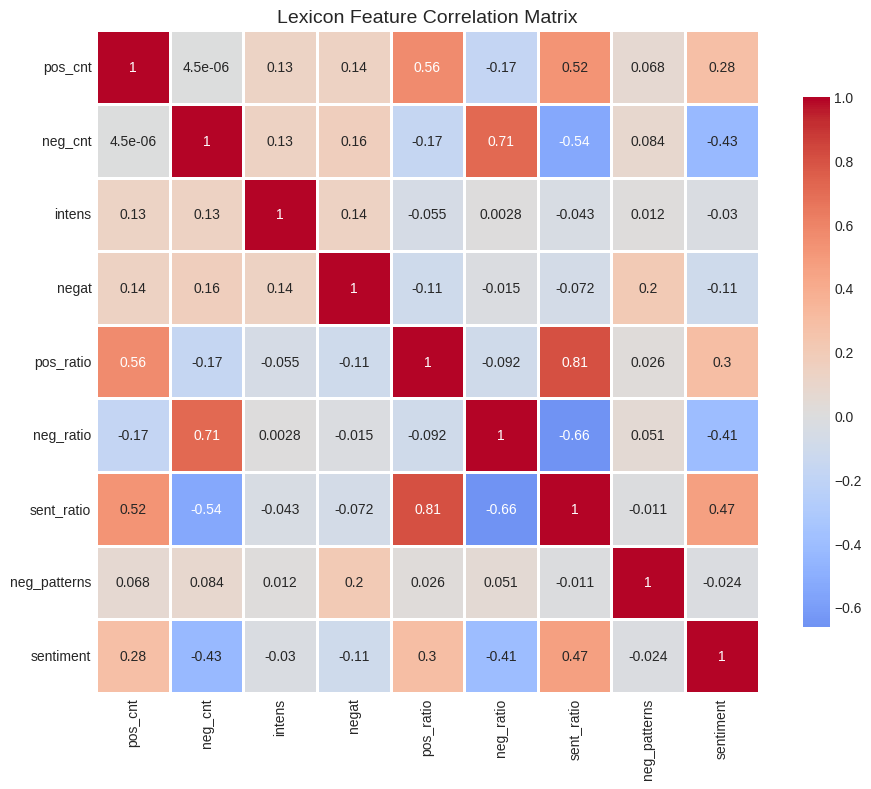

Correlation with sentiment label:
  sent_ratio     : 0.4652
  pos_ratio      : 0.2980
  pos_cnt        : 0.2807
  neg_patterns   : -0.0243
  intens         : -0.0303
  negat          : -0.1080
  neg_ratio      : -0.4064
  neg_cnt        : -0.4311


In [ ]:
# Feature correlation analysis (for dense features)
print("\nFeature Correlation Analysis:")
print("-" * 40)

if X_lexicon is not None:
    # Create correlation matrix for lexicon features
    lexicon_df = pd.DataFrame(X_lexicon,
                             columns=['pos_cnt', 'neg_cnt', 'intens', 'negat',
                                     'pos_ratio', 'neg_ratio', 'sent_ratio', 'neg_patterns'])
    lexicon_df['sentiment'] = y

    correlation_matrix = lexicon_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Lexicon Feature Correlation Matrix', fontsize=14)
    plt.tight_layout()
    plt.savefig('feature_correlation.png', dpi=150, bbox_inches='tight')
    plt.show()

    print("Correlation with sentiment label:")
    sentiment_corr = correlation_matrix['sentiment'].sort_values(ascending=False)
    for feature, corr in sentiment_corr.items():
        if feature != 'sentiment':
            print(f"  {feature:15}: {corr:.4f}")

# **4. Model Building**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import pickle
import warnings
warnings.filterwarnings('ignore')
import time

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [ ]:
print("=" * 70)
print("MODEL BUILDING FOR IMDB SENTIMENT ANALYSIS")
print("=" * 70)

# Load all features
print("\nLoading features...")
try:
    with open('all_features.pkl', 'rb') as f:
        features_dict = pickle.load(f)

    y = features_dict['labels']
    texts = features_dict['texts']

    # Get feature matrices
    X_bow = features_dict['bow_simple']
    X_tfidf = features_dict['tfidf_standard']
    X_tfidf_bigrams = features_dict['tfidf_bigrams']
    X_ngram_12 = features_dict['ngram_12']

    # Check if other features are available
    X_word2vec = features_dict.get('word2vec', None)
    X_glove = features_dict.get('glove', None)
    X_vader = features_dict.get('vader', None)
    X_textblob = features_dict.get('textblob', None)
    X_lexicon = features_dict.get('lexicon', None)

    print("✓ Loaded features from 'all_features.pkl'")

except:
    print("Error: Please run feature engineering first!")
    exit()

MODEL BUILDING FOR IMDB SENTIMENT ANALYSIS

Loading features...
✓ Loaded features from 'all_features.pkl'


##TRAIN/TEST SPLIT

In [ ]:
# 1. TRAIN/TEST SPLIT
print("\n" + "=" * 70)
print("1. TRAIN/TEST SPLIT")
print("=" * 70)

# Split the data (stratified to maintain class distribution)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.2, random_state=42, stratify=y
)

X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

X_train_tfidf_bigrams, X_test_tfidf_bigrams, _, _ = train_test_split(
    X_tfidf_bigrams, y, test_size=0.2, random_state=42, stratify=y
)

X_train_ngram, X_test_ngram, _, _ = train_test_split(
    X_ngram_12, y, test_size=0.2, random_state=42, stratify=y
)



1. TRAIN/TEST SPLIT


In [ ]:
# Split dense features if available
if X_word2vec is not None:
    X_train_w2v, X_test_w2v, _, _ = train_test_split(
        X_word2vec, y, test_size=0.2, random_state=42, stratify=y
    )

if X_glove is not None:
    X_train_glove, X_test_glove, _, _ = train_test_split(
        X_glove, y, test_size=0.2, random_state=42, stratify=y
    )

if X_lexicon is not None:
    X_train_lexicon, X_test_lexicon, _, _ = train_test_split(
        X_lexicon, y, test_size=0.2, random_state=42, stratify=y
    )

if X_vader is not None:
    X_train_vader, X_test_vader, _, _ = train_test_split(
        X_vader, y, test_size=0.2, random_state=42, stratify=y
    )

if X_textblob is not None:
    X_train_textblob, X_test_textblob, _, _ = train_test_split(
        X_textblob, y, test_size=0.2, random_state=42, stratify=y
    )

print(f"Training set size: {len(y_train)}")
print(f"Test set size: {len(y_test)}")
print(f"Positive samples in train: {sum(y_train)} ({sum(y_train)/len(y_train)*100:.1f}%)")
print(f"Positive samples in test: {sum(y_test)} ({sum(y_test)/len(y_test)*100:.1f}%)")


Training set size: 40000
Test set size: 10000
Positive samples in train: 20000 (50.0%)
Positive samples in test: 5000 (50.0%)



Training Traditional ML Models...

Training and evaluating models...
--------------------------------------------------------------------------------

Feature Set: BoW
----------------------------------------
MultinomialNB        | Acc: 0.8496 | F1: 0.8491 | Time: 0.03s
BernoulliNB          | Acc: 0.8519 | F1: 0.8511 | Time: 0.04s
LogisticRegression   | Acc: 0.8751 | F1: 0.8760 | Time: 0.93s
LinearSVM            | Acc: 0.8657 | F1: 0.8666 | Time: 1.65s
SVM_RBF              | Acc: 0.8774 | F1: 0.8809 | Time: 1337.77s
DecisionTree         | Acc: 0.7250 | F1: 0.7236 | Time: 36.23s
RandomForest         | Acc: 0.8502 | F1: 0.8488 | Time: 104.16s
GradientBoosting     | Acc: 0.8053 | F1: 0.8162 | Time: 20.54s
XGBoost              | Acc: 0.8598 | F1: 0.8628 | Time: 2.73s
LightGBM             | Error: Expected np.float32 or np.float64, met type(int64)...
KNN                  | Acc: 0.6567 | F1: 0.6444 | Time: 36.55s

Feature Set: TF-IDF
----------------------------------------
MultinomialNB   

TypeError: agg function failed [how->mean,dtype->object]

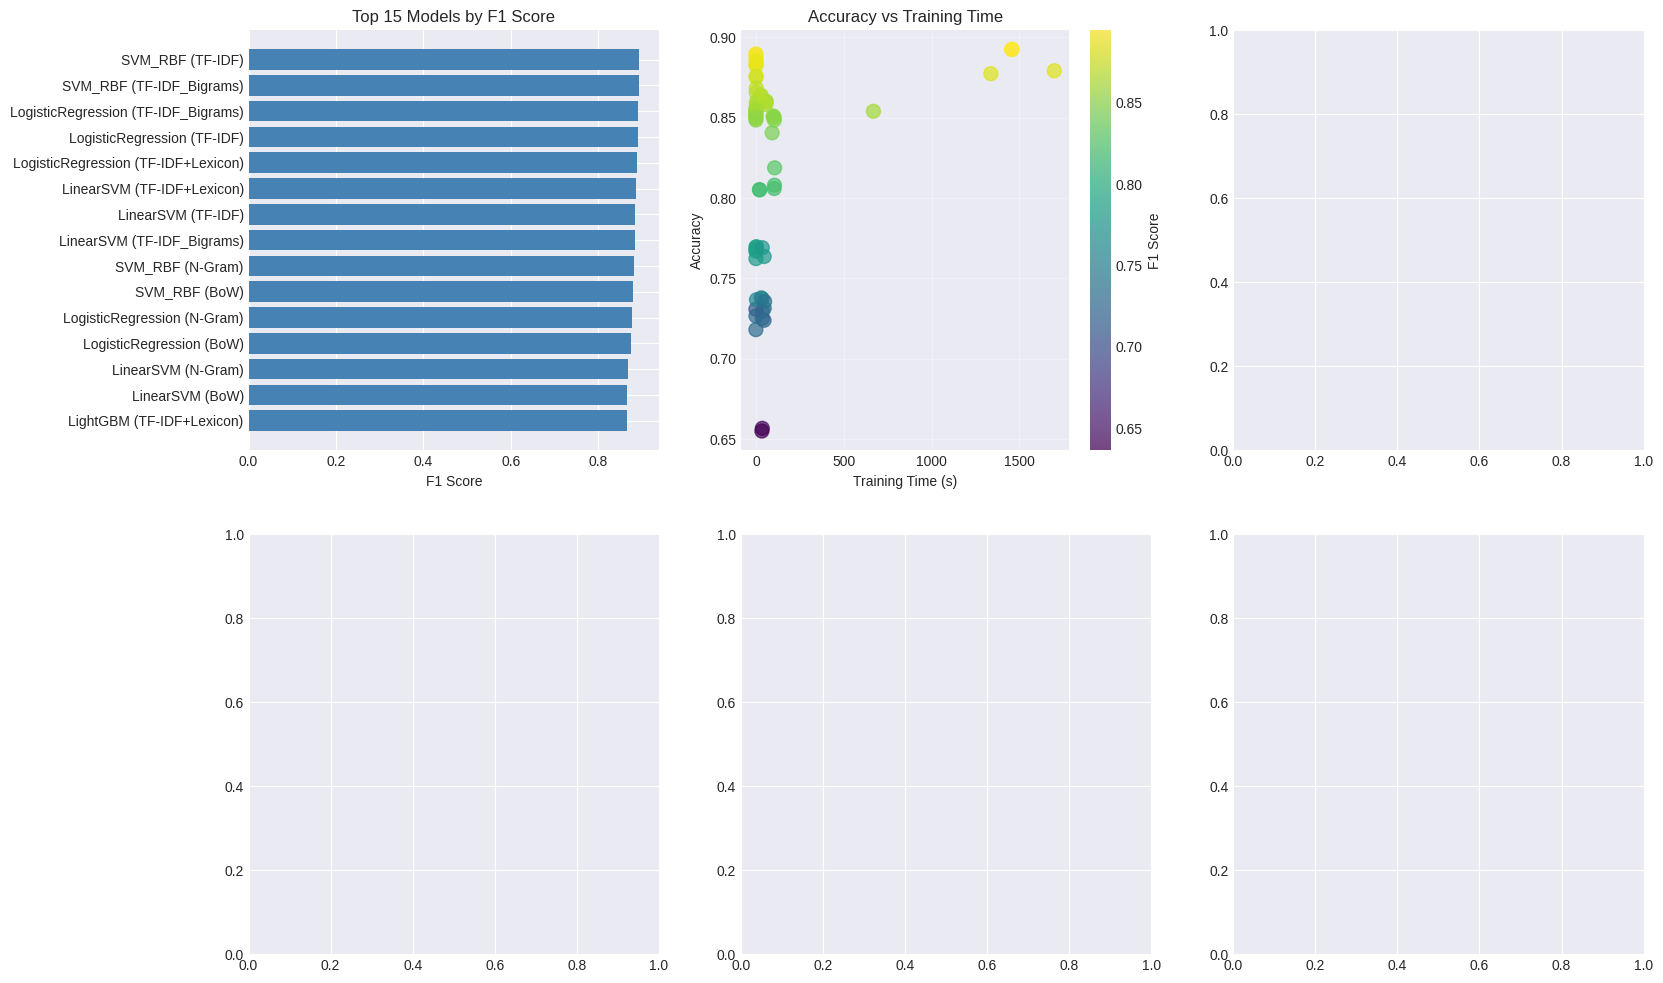

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

class TraditionalMLModels:
    """Class to train and evaluate traditional ML models"""

    def __init__(self):
        self.models = {}
        self.results = {}
        self.feature_sets = {}

    def define_models(self):
        """Define the ML models to train"""
        self.models = {
            # Naive Bayes variants
            'MultinomialNB': MultinomialNB(),
            'BernoulliNB': BernoulliNB(),

            # Linear models
            'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),

            # SVM variants
            'LinearSVM': LinearSVC(random_state=42, max_iter=1000),
            'SVM_RBF': SVC(kernel='rbf', random_state=42),

            # Tree-based models
            'DecisionTree': DecisionTreeClassifier(random_state=42),
            'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),

            # Gradient Boosting
            'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
            'XGBoost': XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'),
            'LightGBM': LGBMClassifier(n_estimators=100, random_state=42),

            # Other
            'KNN': KNeighborsClassifier(n_neighbors=5),
        }
        return self.models

    def define_feature_sets(self):
        """Define different feature sets for comparison"""
        self.feature_sets = {
            'BoW': (X_train_bow, X_test_bow),
            'TF-IDF': (X_train_tfidf, X_test_tfidf),
            'TF-IDF_Bigrams': (X_train_tfidf_bigrams, X_test_tfidf_bigrams),
            'N-Gram': (X_train_ngram, X_test_ngram),
        }

        # Add dense features if available
        if X_word2vec is not None:
            self.feature_sets['Word2Vec'] = (X_train_w2v, X_test_w2v)

        if X_glove is not None:
            self.feature_sets['GloVe'] = (X_train_glove, X_test_glove)

        if X_lexicon is not None:
            self.feature_sets['Lexicon'] = (X_train_lexicon, X_test_lexicon)

        # Combined features
        if X_lexicon is not None and X_tfidf is not None:
            # Combine TF-IDF with lexicon features
            from scipy.sparse import hstack
            X_train_combined = hstack([X_train_tfidf, X_train_lexicon])
            X_test_combined = hstack([X_test_tfidf, X_test_lexicon])
            self.feature_sets['TF-IDF+Lexicon'] = (X_train_combined, X_test_combined)

        return self.feature_sets

    def train_and_evaluate(self):
        """Train and evaluate all models on all feature sets"""
        self.define_models()
        self.define_feature_sets()

        results_list = []

        print("\nTraining and evaluating models...")
        print("-" * 80)

        for feature_name, (X_train, X_test) in self.feature_sets.items():
            print(f"\nFeature Set: {feature_name}")
            print("-" * 40)

            for model_name, model in self.models.items():
                try:
                    start_time = time.time()

                    # Skip Gaussian models for sparse features
                    if model_name in ['GaussianNB'] and hasattr(X_train, 'toarray'):
                        continue

                    # Train the model
                    model.fit(X_train, y_train)

                    # Make predictions
                    y_pred = model.predict(X_test)
                    y_pred_prob = None

                    # Get probabilities if available
                    if hasattr(model, 'predict_proba'):
                        y_pred_prob = model.predict_proba(X_test)[:, 1]

                    # Calculate metrics
                    accuracy = accuracy_score(y_test, y_pred)
                    precision = precision_score(y_test, y_pred)
                    recall = recall_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred)

                    # Calculate AUC if probabilities available
                    auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None

                    # Calculate training time
                    training_time = time.time() - start_time

                    # Store results
                    result = {
                        'Feature_Set': feature_name,
                        'Model': model_name,
                        'Accuracy': accuracy,
                        'Precision': precision,
                        'Recall': recall,
                        'F1_Score': f1,
                        'AUC': auc,
                        'Training_Time': training_time
                    }

                    results_list.append(result)

                    # Print progress
                    print(f"{model_name:20} | Acc: {accuracy:.4f} | F1: {f1:.4f} | Time: {training_time:.2f}s")

                    # Store model for later use
                    key = f"{feature_name}_{model_name}"
                    self.results[key] = {
                        'model': model,
                        'y_pred': y_pred,
                        'y_pred_prob': y_pred_prob,
                        'metrics': result
                    }

                except Exception as e:
                    print(f"{model_name:20} | Error: {str(e)[:50]}...")
                    continue

        # Convert results to DataFrame
        self.results_df = pd.DataFrame(results_list)
        return self.results_df

    def plot_comparison(self):
        """Create comparison plots"""
        if not hasattr(self, 'results_df'):
            print("No results to plot. Run train_and_evaluate() first.")
            return

        # Sort by F1 score
        sorted_df = self.results_df.sort_values('F1_Score', ascending=False)

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))

        # Plot 1: Top models by F1 Score
        top_n = min(15, len(sorted_df))
        top_models = sorted_df.head(top_n)

        # Create model+feature labels
        top_models['Model_Feature'] = top_models['Model'] + ' (' + top_models['Feature_Set'] + ')'
        x_pos = np.arange(len(top_models))
        axes[0,0].barh(x_pos, top_models['F1_Score'], color='steelblue')
        axes[0,0].set_yticks(x_pos)
        axes[0,0].set_yticklabels(top_models['Model_Feature'])
        axes[0,0].set_xlabel('F1 Score')
        axes[0,0].set_title(f'Top {top_n} Models by F1 Score')
        axes[0,0].invert_yaxis()

        # Plot 2: Accuracy vs Training Time
        scatter = axes[0,1].scatter(self.results_df['Training_Time'], self.results_df['Accuracy'],
                                   c=self.results_df['F1_Score'], cmap='viridis',
                                   s=100, alpha=0.7)
        axes[0,1].set_xlabel('Training Time (s)')
        axes[0,1].set_ylabel('Accuracy')
        axes[0,1].set_title('Accuracy vs Training Time')
        axes[0,1].grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=axes[0,1], label='F1 Score')

        # Plot 3: Performance by Feature Set
        feature_group = self.results_df.groupby('Feature_Set').mean()
        features = feature_group.index.tolist()

        x = np.arange(len(features))
        width = 0.25

        axes[0,2].bar(x - width, feature_group['Accuracy'], width, label='Accuracy', color='green', alpha=0.7)
        axes[0,2].bar(x, feature_group['F1_Score'], width, label='F1 Score', color='blue', alpha=0.7)
        axes[0,2].bar(x + width, feature_group['Precision'], width, label='Precision', color='red', alpha=0.7)

        axes[0,2].set_xlabel('Feature Set')
        axes[0,2].set_ylabel('Score')
        axes[0,2].set_title('Average Performance by Feature Set')
        axes[0,2].set_xticks(x)
        axes[0,2].set_xticklabels(features, rotation=45, ha='right')
        axes[0,2].legend()

        # Plot 4: Performance by Model Type
        model_group = self.results_df.groupby('Model').mean()
        models = model_group.index.tolist()

        x = np.arange(len(models))
        axes[1,0].barh(x, model_group['F1_Score'], color='darkorange')
        axes[1,0].set_yticks(x)
        axes[1,0].set_yticklabels(models)
        axes[1,0].set_xlabel('Average F1 Score')
        axes[1,0].set_title('Average Performance by Model Type')
        axes[1,0].invert_yaxis()

        # Plot 5: Confusion Matrix for best model
        best_result = sorted_df.iloc[0]
        best_key = f"{best_result['Feature_Set']}_{best_result['Model']}"

        if best_key in self.results:
            y_pred = self.results[best_key]['y_pred']
            cm = confusion_matrix(y_test, y_pred)

            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                       xticklabels=['Negative', 'Positive'],
                       yticklabels=['Negative', 'Positive'],
                       ax=axes[1,1])
            axes[1,1].set_xlabel('Predicted')
            axes[1,1].set_ylabel('Actual')
            axes[1,1].set_title(f"Confusion Matrix\n{best_result['Model']} on {best_result['Feature_Set']}")

        # Plot 6: ROC Curves for top 5 models
        axes[1,2].plot([0, 1], [0, 1], 'k--', label='Random')

        colors = plt.cm.tab10(np.linspace(0, 1, 5))
        for i, (_, row) in enumerate(sorted_df.head(5).iterrows()):
            key = f"{row['Feature_Set']}_{row['Model']}"
            if key in self.results and self.results[key]['y_pred_prob'] is not None:
                fpr, tpr, _ = roc_curve(y_test, self.results[key]['y_pred_prob'])
                auc = row['AUC'] if row['AUC'] is not None else 0
                axes[1,2].plot(fpr, tpr, color=colors[i],
                              label=f"{row['Model']} (AUC={auc:.3f})")

        axes[1,2].set_xlabel('False Positive Rate')
        axes[1,2].set_ylabel('True Positive Rate')
        axes[1,2].set_title('ROC Curves for Top 5 Models')
        axes[1,2].legend(loc='lower right')
        axes[1,2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('traditional_ml_comparison.png', dpi=150, bbox_inches='tight')
        plt.show()

        return sorted_df

# Train and evaluate traditional ML models
print("\nTraining Traditional ML Models...")
ml_models = TraditionalMLModels()
results_df = ml_models.train_and_evaluate()

# Display top 10 models
print("\n" + "=" * 70)
print("TOP 10 TRADITIONAL ML MODELS")
print("=" * 70)
top_10 = results_df.sort_values('F1_Score', ascending=False).head(10)
print(top_10[['Feature_Set', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'AUC']].to_string())
# Plot comparisons
ml_models.plot_comparison()
